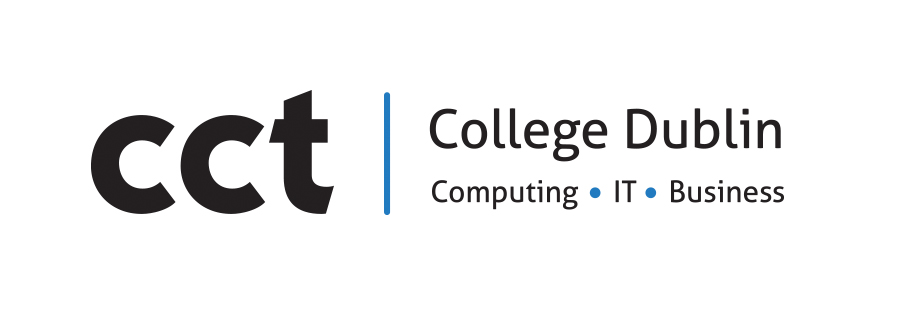


# CA3: Glass Identification with Deep Learning

### Student: `Lauro Cesar Ribeiro - 2016291`  Lecturer: `David McQuaid` Year: `4` Level: `8`


## Table of Contents
1. [Tasks](#p1)
2. [Data Dictionary](#p2)
3. [Importing Dependencies](#p3)
4. [Importing Dataset](#p4)
5. [Exploratory Data Analysis](#p5)
6. [Data Visualization](#p6)
7. [Data Cleaning](#p7)
8. [Data Modelling](#p8)
9. [Deep Learning Implementation](#p9)
10. [Conclusion](#p10)
11. [References](#p11)

# <a name="p1">Tasks</a>

- Perform an initial analysis of the data (EDA) using python in your Jupyter notebook. Discuss your findings and what relevance they might have on your planned Neural Network model.
- Perform any preparation of the data, that you feel is necessary, using python in your Jupyter notebook. Explain your rationale behind your data preparation and how it will assist you.
- Create and implement a Neural Network that will output a classification based on the Type of glass: (class attribute) feature. Test this model and try to improve it using different configurations of neurons/layers/loss functions/activation functions and discuss your findings and final rational for the Neural network configuration.
- Make a classification using your test data, using your final Neural Network configuration and comment on the accuracy differential between the training and testing set. 


# <a name="p2">Data Dictionary</a>

**Features:**

* RI: refractive index
* NA: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
* Mg: Magnesium
* Al: Aluminum
* K: Potassium
* Ca: Calcium
* Ba: Barium
* Fe: Iron
*  Type of glass: 
    * 1: building_windows_float_processed
    * 2: building_windows_non_float_processed 
    * 3: vehicle_windows_float_processed
    * 4: vehicle_windows_non_float_processed (none in this database)
    * 5: containers 
    * 6: tableware
    * 7: headlamps

# <a name="p3">Importing Dependencies</a>

In [1]:
from IPython.display import display
from scipy.stats import f_oneway, ttest_ind, boxcox
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import colors, legend, patches
from numpy import float32
from pandas import DataFrame
from seaborn import pointplot, boxplot, cubehelix_palette, set_style, kdeplot, color_palette, heatmap, diverging_palette
from matplotlib.pyplot import show, figure, rc_context, subplot, suptitle, title
from itertools import permutations

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from collections import Counter

from sklearn.preprocessing import LabelEncoder

from keras.models import Sequential
from keras.utils import normalize, to_categorical
from keras.layers import Dense, Activation, Dropout, Input
from keras.optimizers import SGD

# <a name="p4">Importing Dataset</a>

The dataset has come unlabelled but, I used the data dictionary to appropriately assign a header to the correspondly column.

In [2]:
columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

df= pd.read_csv('glass_data.csv', names=columns)

# <a name="p5">Exploratory Data Analysis</a>

After I correctly imported the dataset with their labels on it, It is time for an **Exploratory Data Analysis**, a useful method to analyse and investigate datasets by summarising their main characteristics with data visualisation and determine if the statistical techniques that I am considering for data analysis are appropriate.

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Checking some info regards to our `df` dataframe, we case see there is `214 entries`, `10 columns` and `Non-null values` in our dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1 to 214
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.4 KB


In [5]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### Initial Findings

The features are not on the same scale. For example, **Si** has a mean of `72.65` while **Fe** has a mean value of `0.057`, and **Ba** has a mean value of `0.175`. Features should be on the same scale for an algorithm to converge fast. I will go ahead and check the distribution of the glass types.

That makes me think of our Target variable `Type` might be unbalanced so, I will perform an analysis on it.

<IPython.core.display.Javascript object>

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

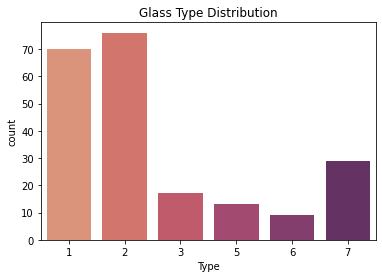

In [6]:
sns.countplot(df.Type, palette='flare').set_title("Glass Type Distribution")
df.Type.value_counts()

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Distribution of labels')

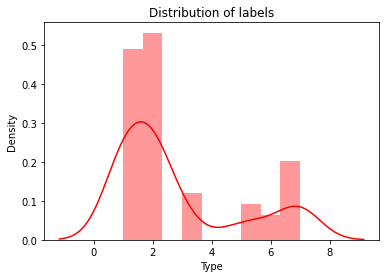

In [7]:
sns.distplot(df['Type'], color='red').set_title("Distribution of labels")

So as we can see the distribution is not gaussian and is quite unbalanced, with Types 1 and 3 constituing more than 50% of data, It is **not good** for our Machine Learning model by causing a biased classification of our glasses.

## Correlation coefficients among features
Correlation refers to the relationship between two variables. Values above `0.70` or `0.80` indicate that there is a **high correlation**. Finding highly correlated features in the data set can be misleading for the model. Attention should be paid to feature selection while applying the model.

That would give me a better idea on how the features are coorelated one another before I start taking any action over the data.


<IPython.core.display.Javascript object>

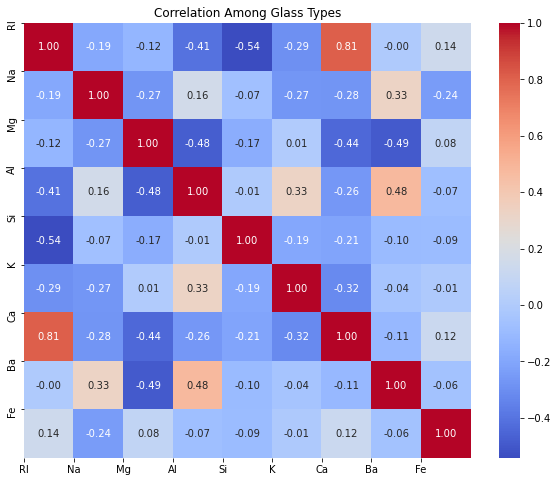

In [8]:
features = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

corr = df[features].corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f").set_title("Correlation Among Glass Types")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)

plt.show()

From this heatmap I can bring up some hypothesis:

- There is a high correlation of **0.81** between `CA` and `RI`. This could be a hint to perform `Principal Component Analysis` in order to decorrelate some of the input features or any technique to transfom them into a single type.
- There is a positive correlation of **0.48** between `Ba` and `Al`.
- There is also a positive correlation of **0.33** between `Ba` and `Na`.

- There is a **negative correlation** between `Si` and `RI` of **-0.54**.
- There is a **negative correlation** between `Mg` and `Ba` of **-0.49**.

*Negative Correlations* might cause `cancelling effect`, a condition in which positive and negative charges or same frequencies of positive and negative polarities nullify each other, resulting an unintentionally interference in the Classification algorithm.

# <a name="p6">Data Visualization</a>

I will iniatially split the data to work on the Target feature `Type`.

In [9]:
target="Type"
features = df.columns[:-1].tolist()
X = df.drop(target,1)
y = df[target]

I defined functions to display my graphs to analyse the features individually and independently from one another.

In [10]:
def display_ftest(data,category,numeric):
        f, p = f_oneway(*get_samples(data, category, numeric).values())
        display(DataFrame(data = {numeric:{"F score":f,"p-value":p}}).round(2).T)

def get_samples(data, category, numeric):
    samples = {}
    for c in data[category].unique():
        key = category + "_" + str(c)
        series = data[data[category] == c][numeric]
        samples[key] = series.rename(str(c))
    return samples

In [11]:
def display_multi_category_x_numeric_analysis(data, category, numeric):

    subcategory_count = len(data[category].unique())
    chosen_palette = color_palette("colorblind",subcategory_count, desat=0.85)
    set_style("whitegrid")

    figure(figsize=(20,20))
    suptitle(numeric, fontsize=24)

    order = data.groupby(category)[numeric].mean().sort_values(ascending=False).index
    
#===============================================================================================================================
    
    with rc_context({'lines.linewidth': 0.8}):
        
        subplot(221)
        point_plot = pointplot(x=category, y=numeric, order=order, data=data, capsize=.14, color="#383838")
        point_plot.set_ylabel(numeric + " mean")
        point_plot.set_xlabel(point_plot.get_xlabel(), visible=False)
        point_plot.set_xticklabels(point_plot.get_xticklabels())

#===============================================================================================================================

        subplot(222)
        
        box_plot = boxplot(x=category, y=numeric, order=order, palette = chosen_palette, data=data)
        box_plot.set_xlabel(box_plot.get_xlabel, visible=False)
        box_plot.set_ylabel(numeric + " (mg)")
        box_plot.set_xticklabels(box_plot.get_xticklabels())
        
#===============================================================================================================================

        samples = get_samples(data, category, numeric)
        subplot(223)
        i = iter(chosen_palette)
        for key in [label.get_text() for label in box_plot.get_xticklabels()]:
            kde_plot = kdeplot(samples[category + "_" + str(key)], color=next(i), shade=True, linewidth=1.5)
            
#===============================================================================================================================

        subplot(224)

        p = diverging_palette(10, 220, sep=80, n=10)
        myColors = [p[5],p[8]]
        cmap = colors.LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
        
        p_value_table = DataFrame(index = samples.keys(), columns = samples.keys())
    
        from scipy.stats import ttest_ind

        def is_statistically_significant(p):

            if p < 0.05:
                return 1
            else:
                return 0
        
        for c1,c2 in permutations(samples.keys(),2):
                    
            t,p = ttest_ind(samples[c1],samples[c2])
            p_value_table[c1][c2] = is_statistically_significant(p)
            
        heat_map = heatmap(p_value_table.fillna(float32(None)), linewidths=2, cmap=cmap, cbar=False, square=True)
        title("p-value Grid", fontsize=14)

        classes = ['p >= 0.05', 'p < 0.05']
        recs = []
        for i in range(0,len(myColors)):
            recs.append(patches.Rectangle((0,0),1,1,fc=myColors[i]))
        heat_map.legend(recs, classes, loc=4, bbox_to_anchor=(1, 1))
        
#===============================================================================================================================
        
        show()
    
        if len(data[category].unique()) > 2:
            display_ftest(data,category,numeric)
            
#===============================================================================================================================

Iterate over columns to Display the next Column sequentially

In [12]:
i = iter(X.columns)

Start Displaying our features for analysis.

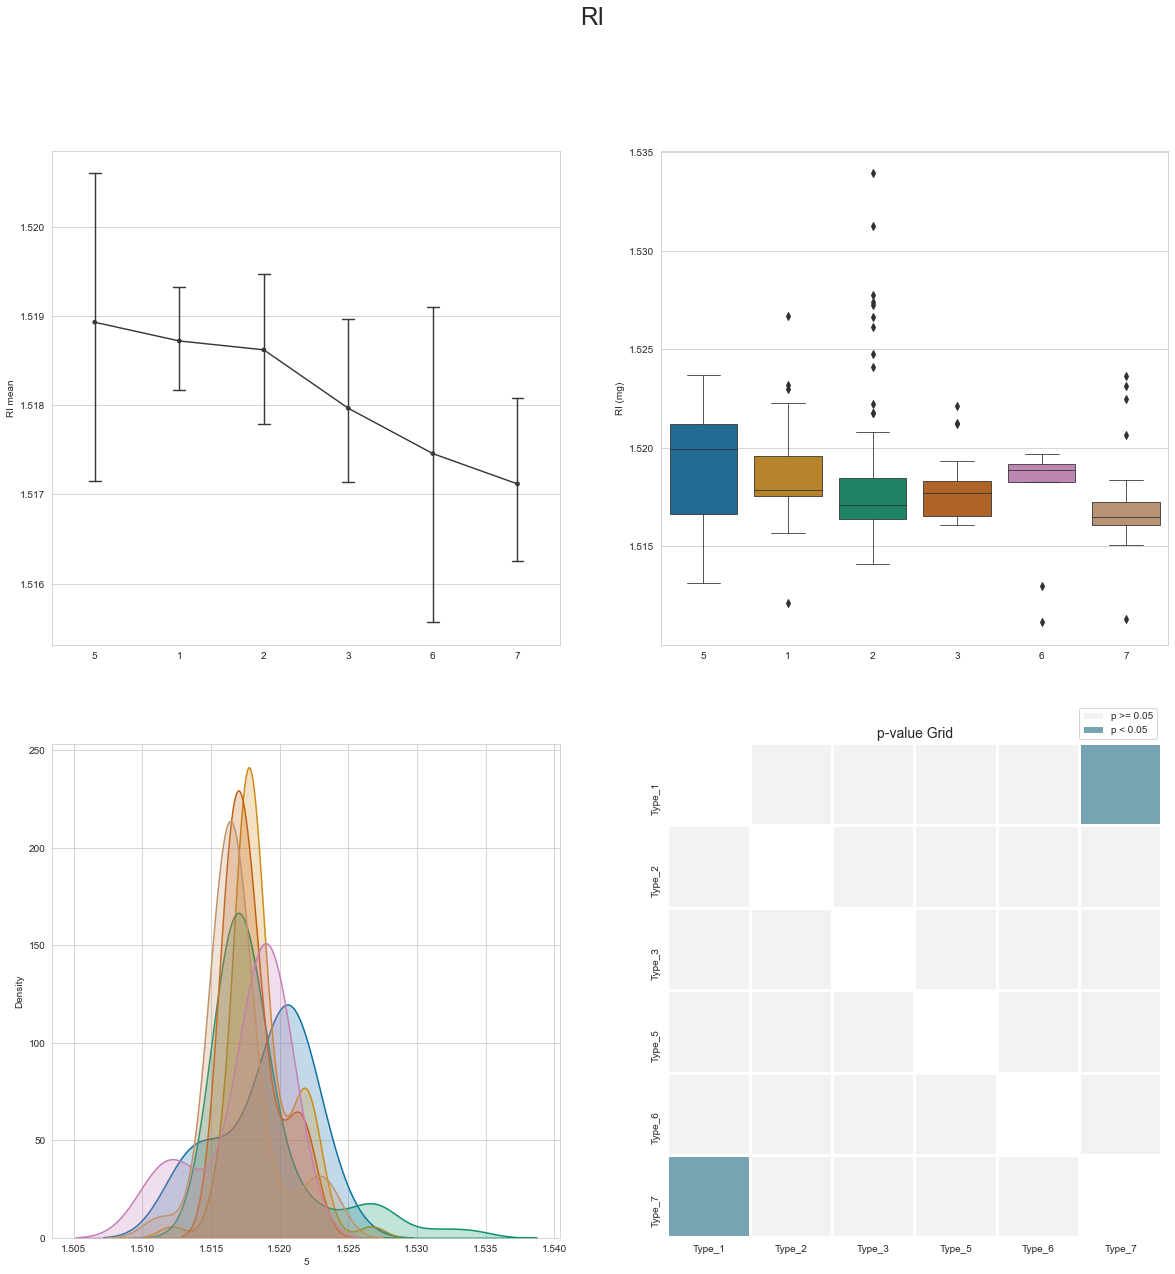

,F score,p-value
RI,1.61,0.16


In [13]:
display_multi_category_x_numeric_analysis(df,target,next(i))

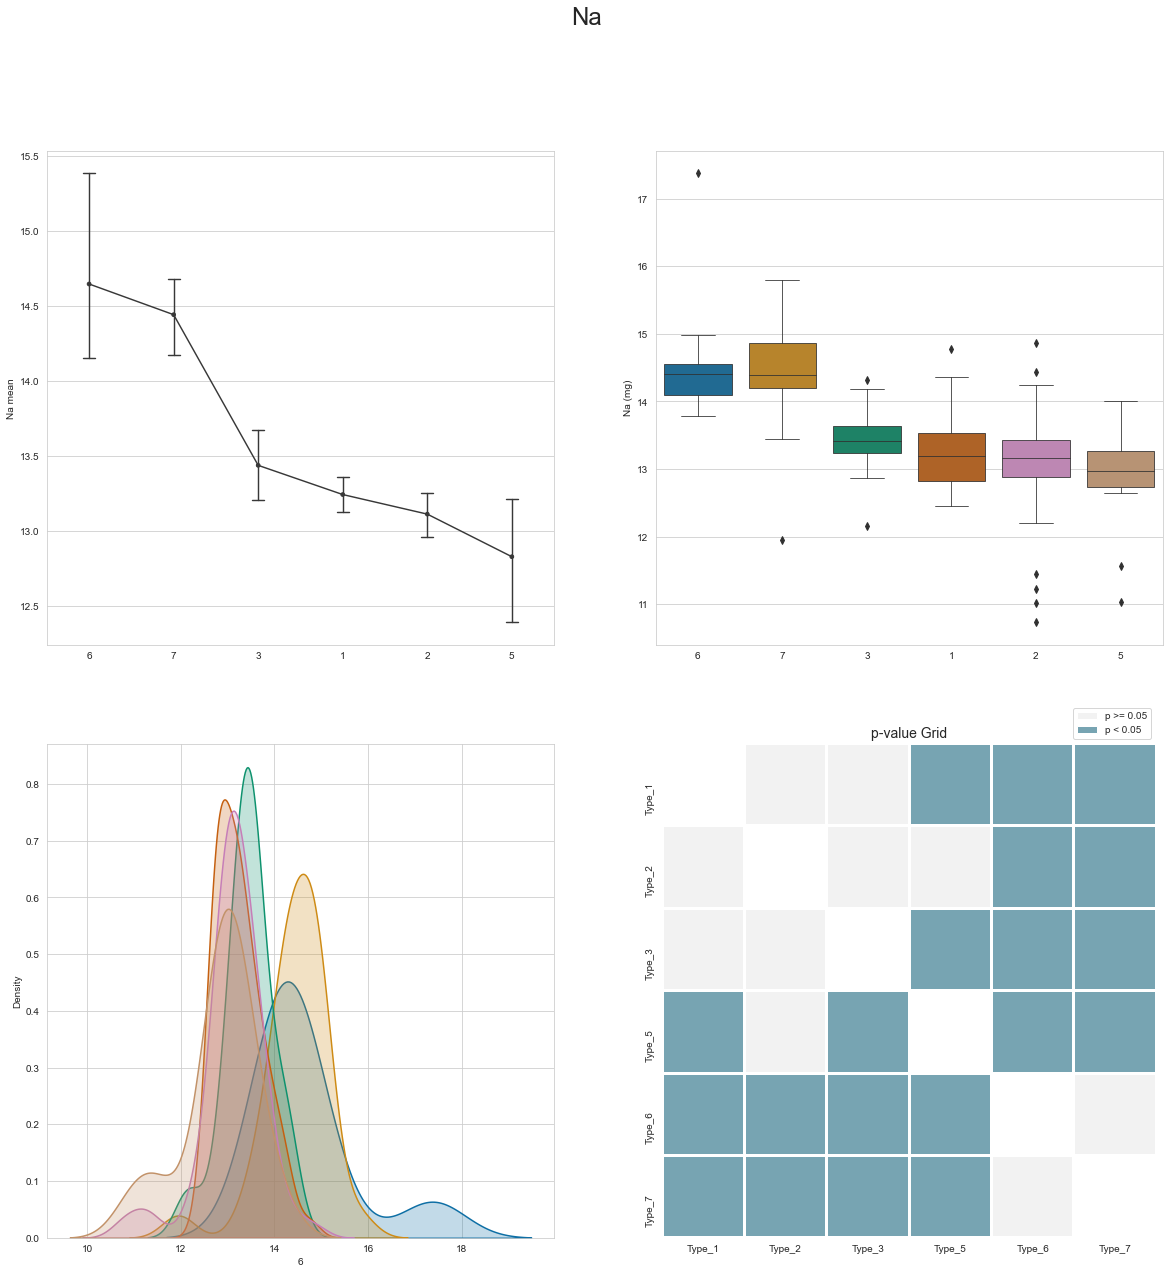

,F score,p-value
Na,28.55,0.0


In [14]:
display_multi_category_x_numeric_analysis(df,target,next(i))

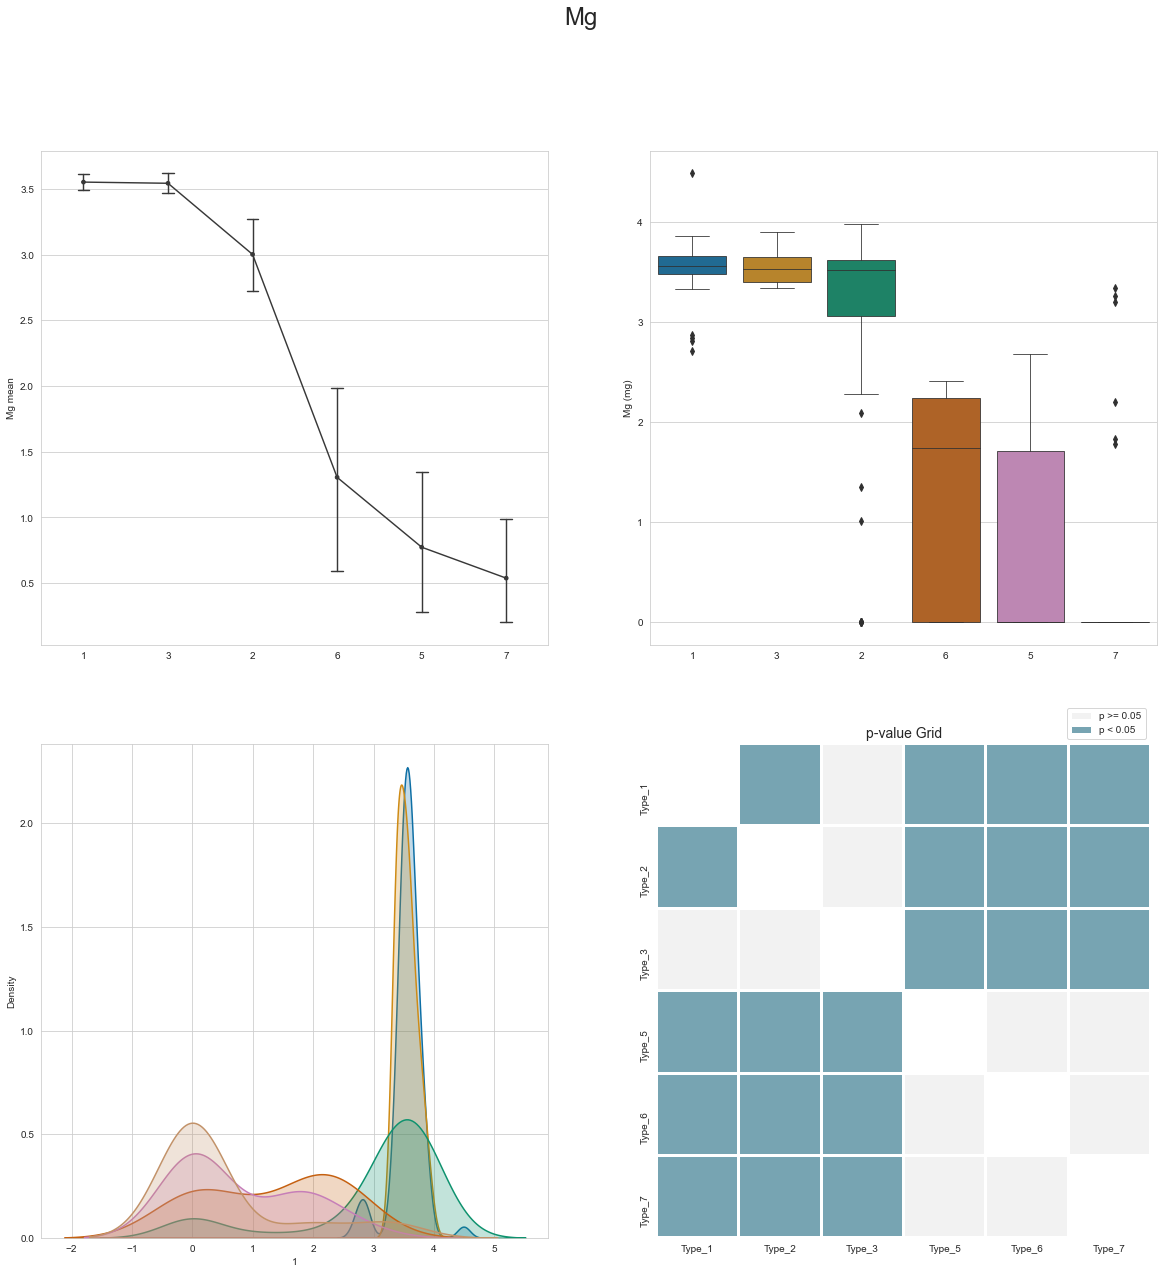

,F score,p-value
Mg,65.54,0.0


In [15]:
display_multi_category_x_numeric_analysis(df,target,next(i))

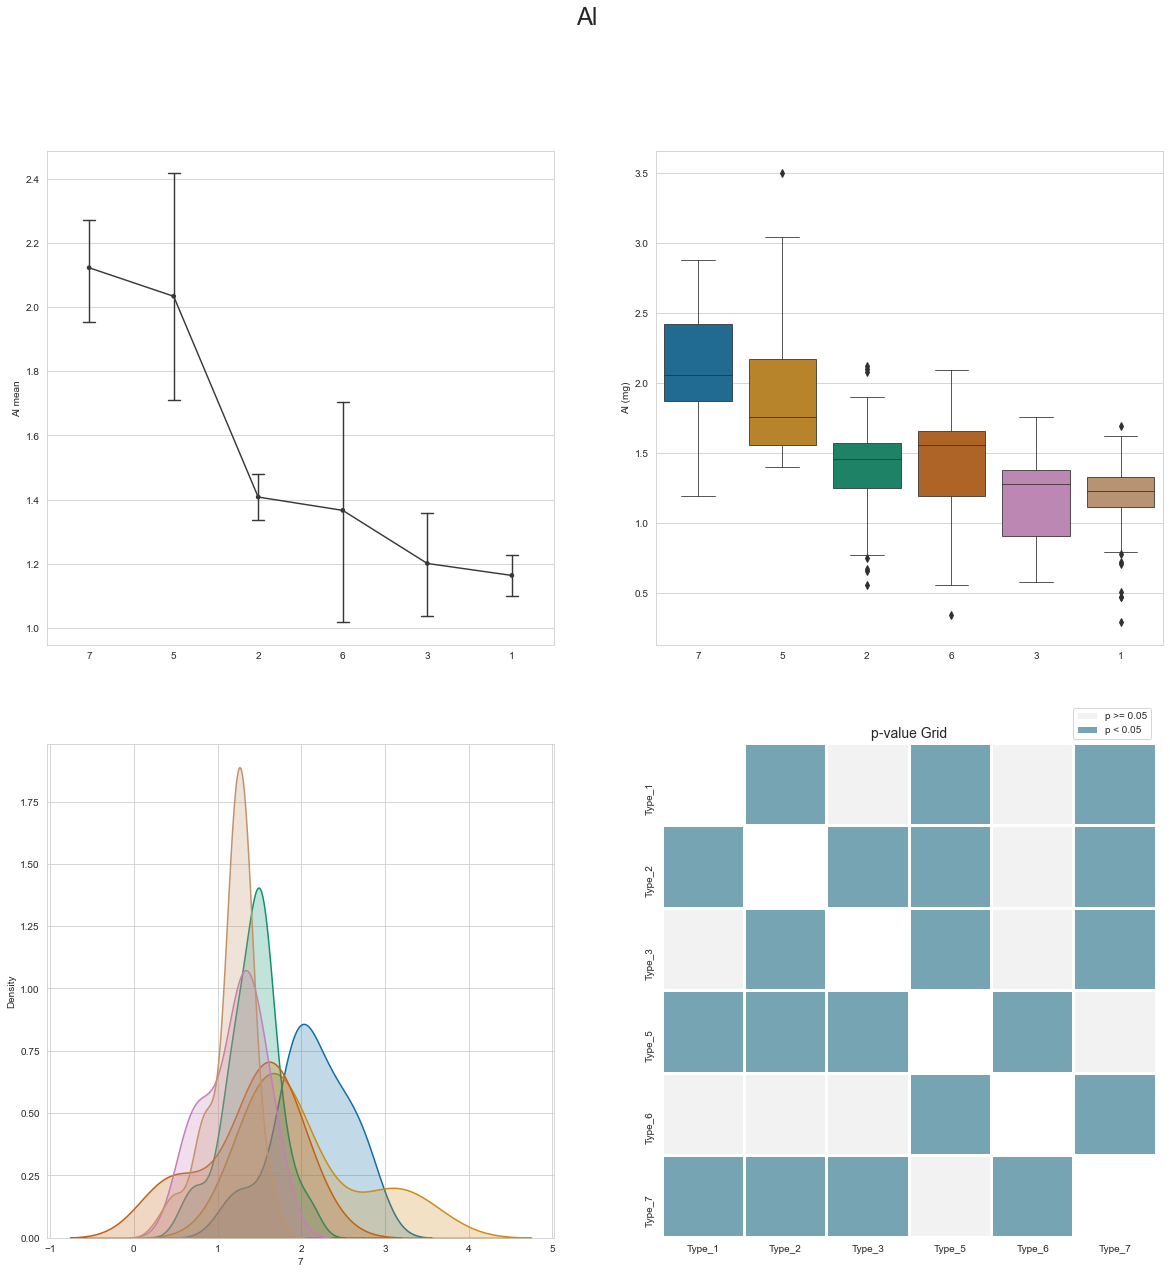

,F score,p-value
Al,35.73,0.0


In [16]:
display_multi_category_x_numeric_analysis(df,target,next(i))

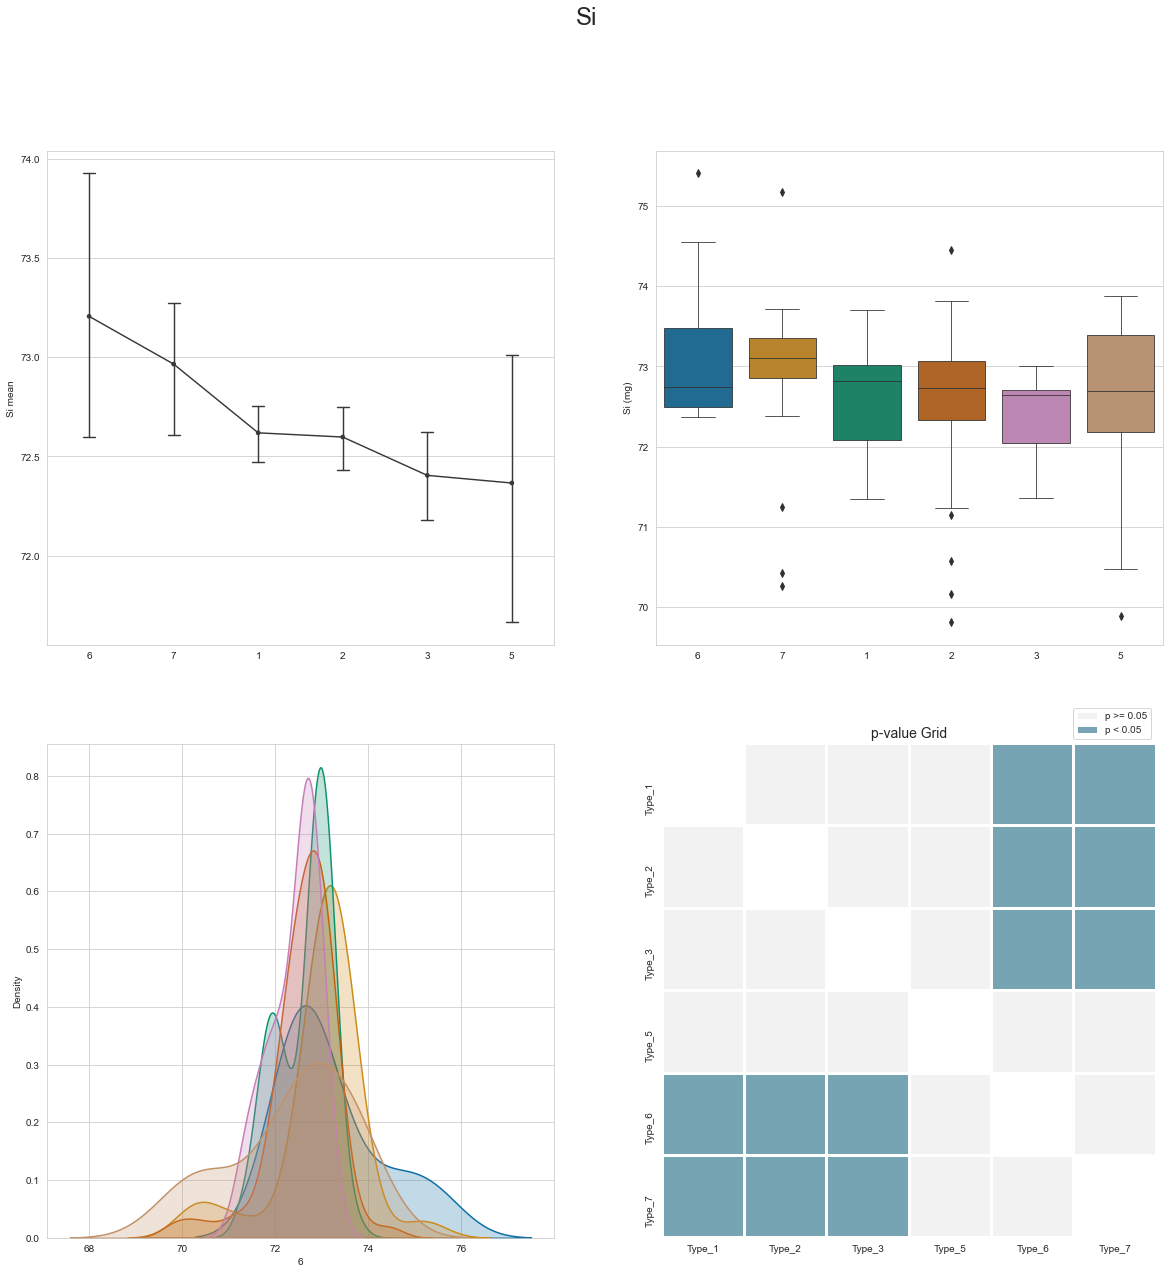

,F score,p-value
Si,2.79,0.02


In [17]:
display_multi_category_x_numeric_analysis(df,target,next(i))

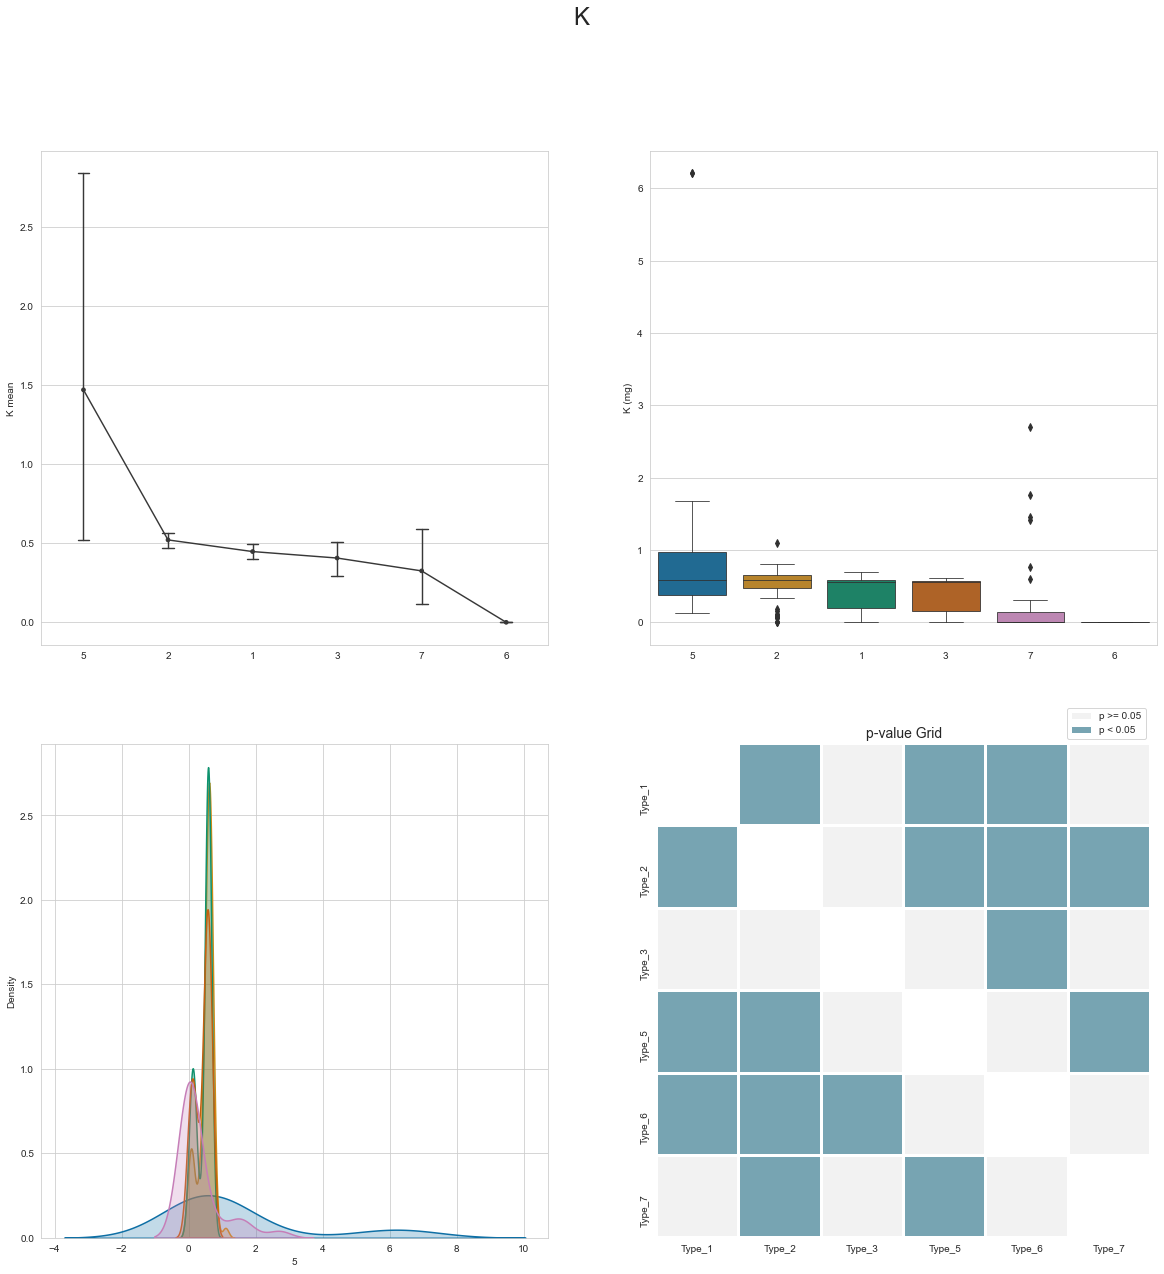

,F score,p-value
K,8.75,0.0


In [18]:
display_multi_category_x_numeric_analysis(df,target,next(i))

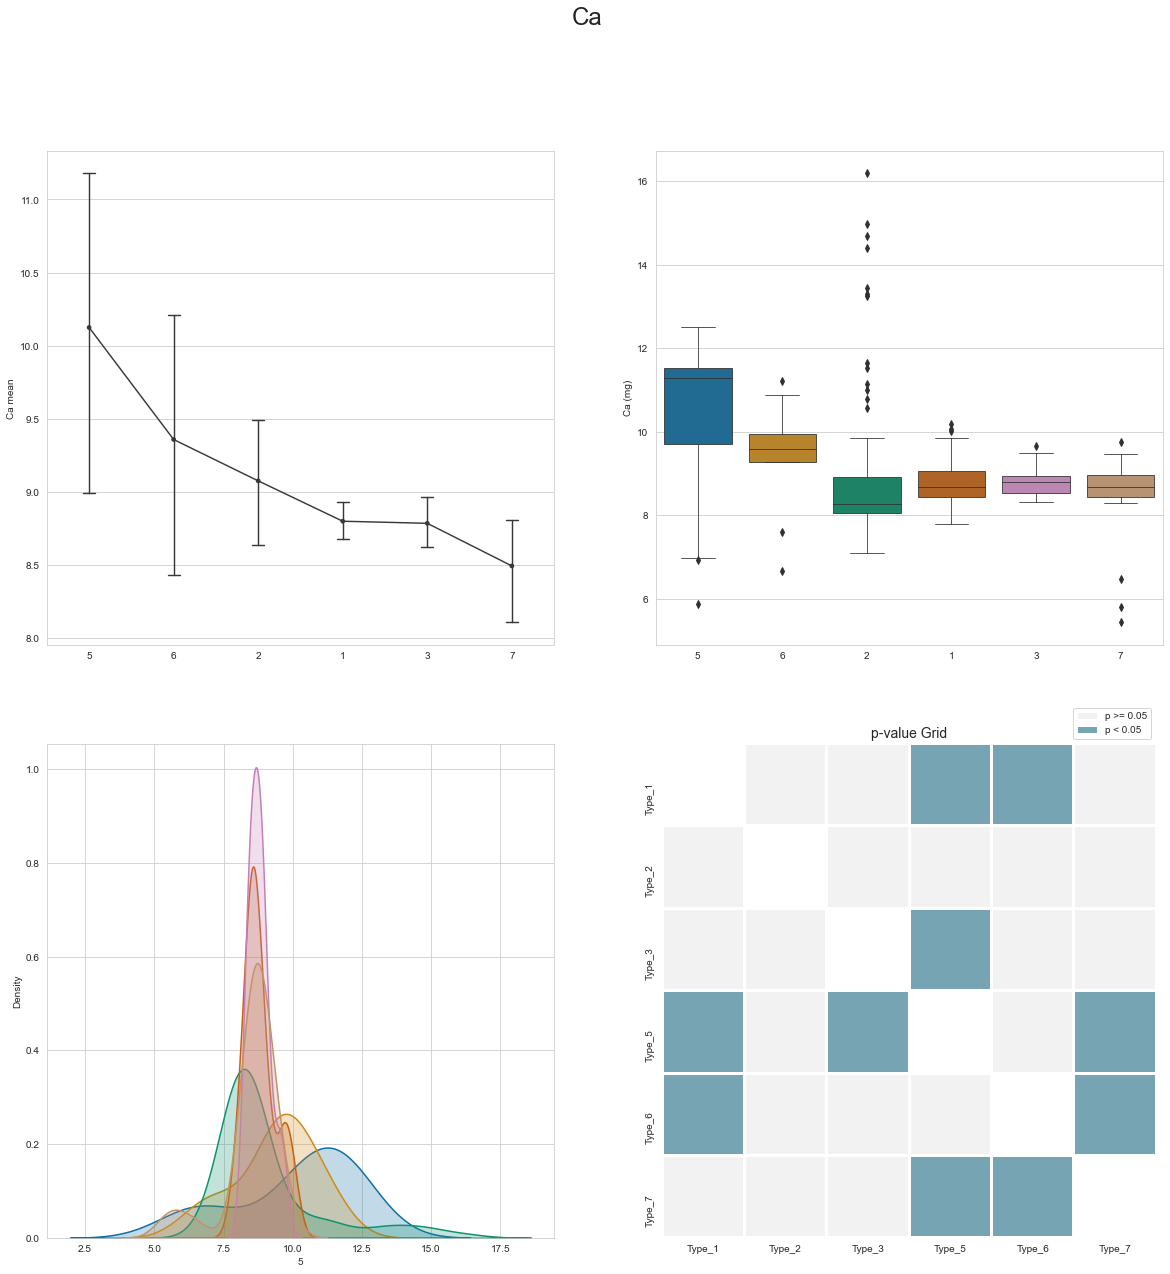

,F score,p-value
Ca,2.97,0.01


In [19]:
display_multi_category_x_numeric_analysis(df,target,next(i))

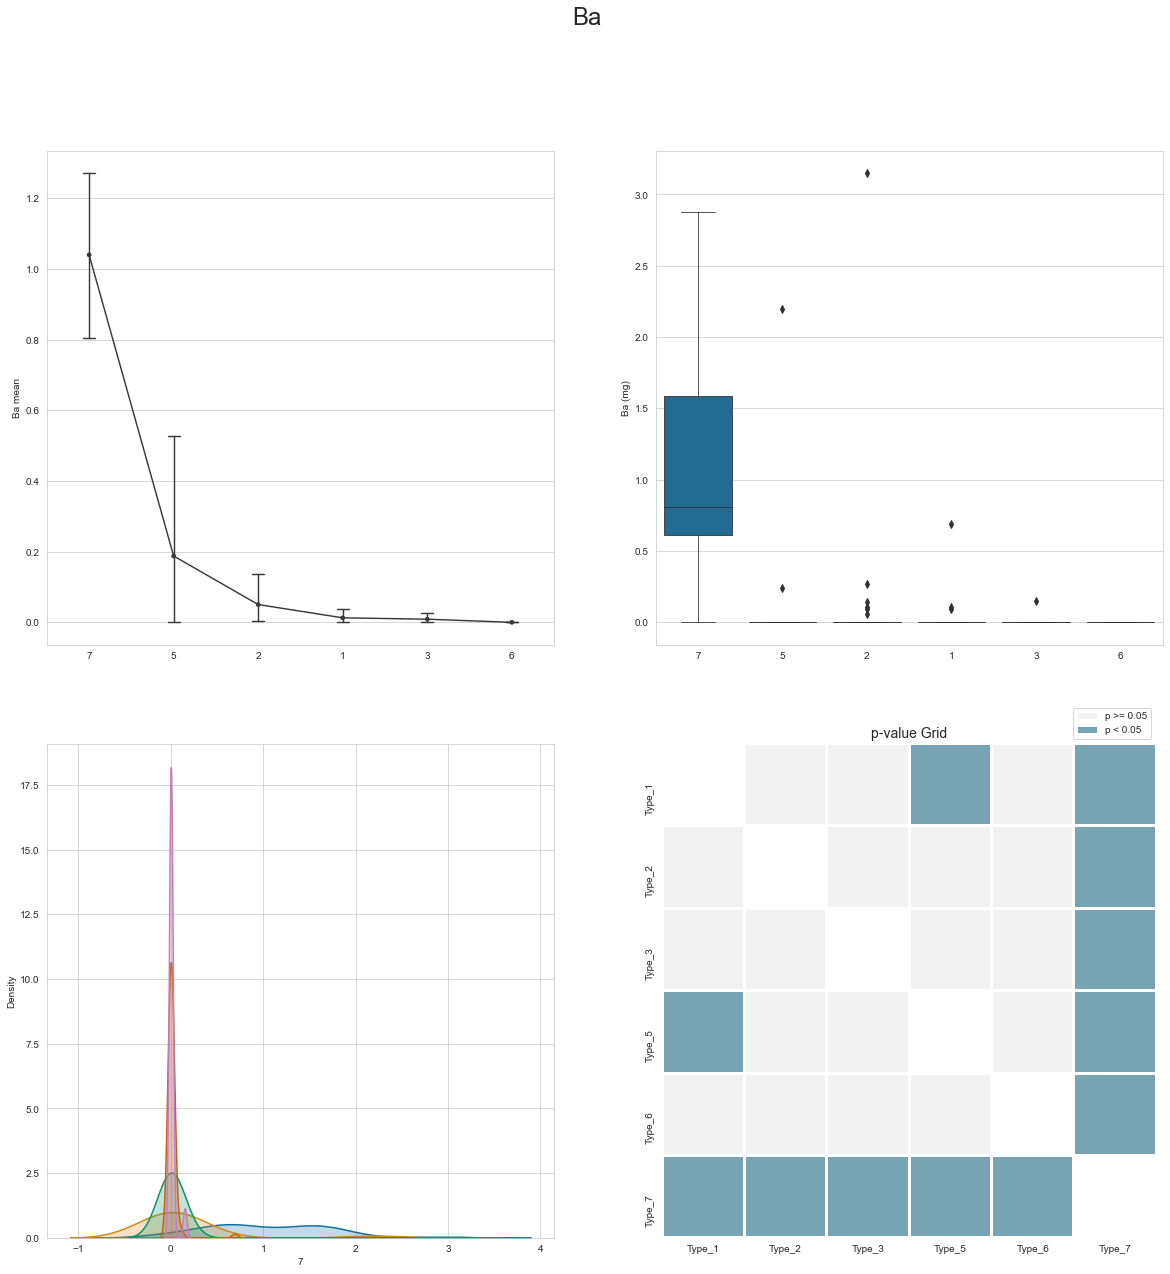

,F score,p-value
Ba,38.97,0.0


In [20]:
display_multi_category_x_numeric_analysis(df,target,next(i))

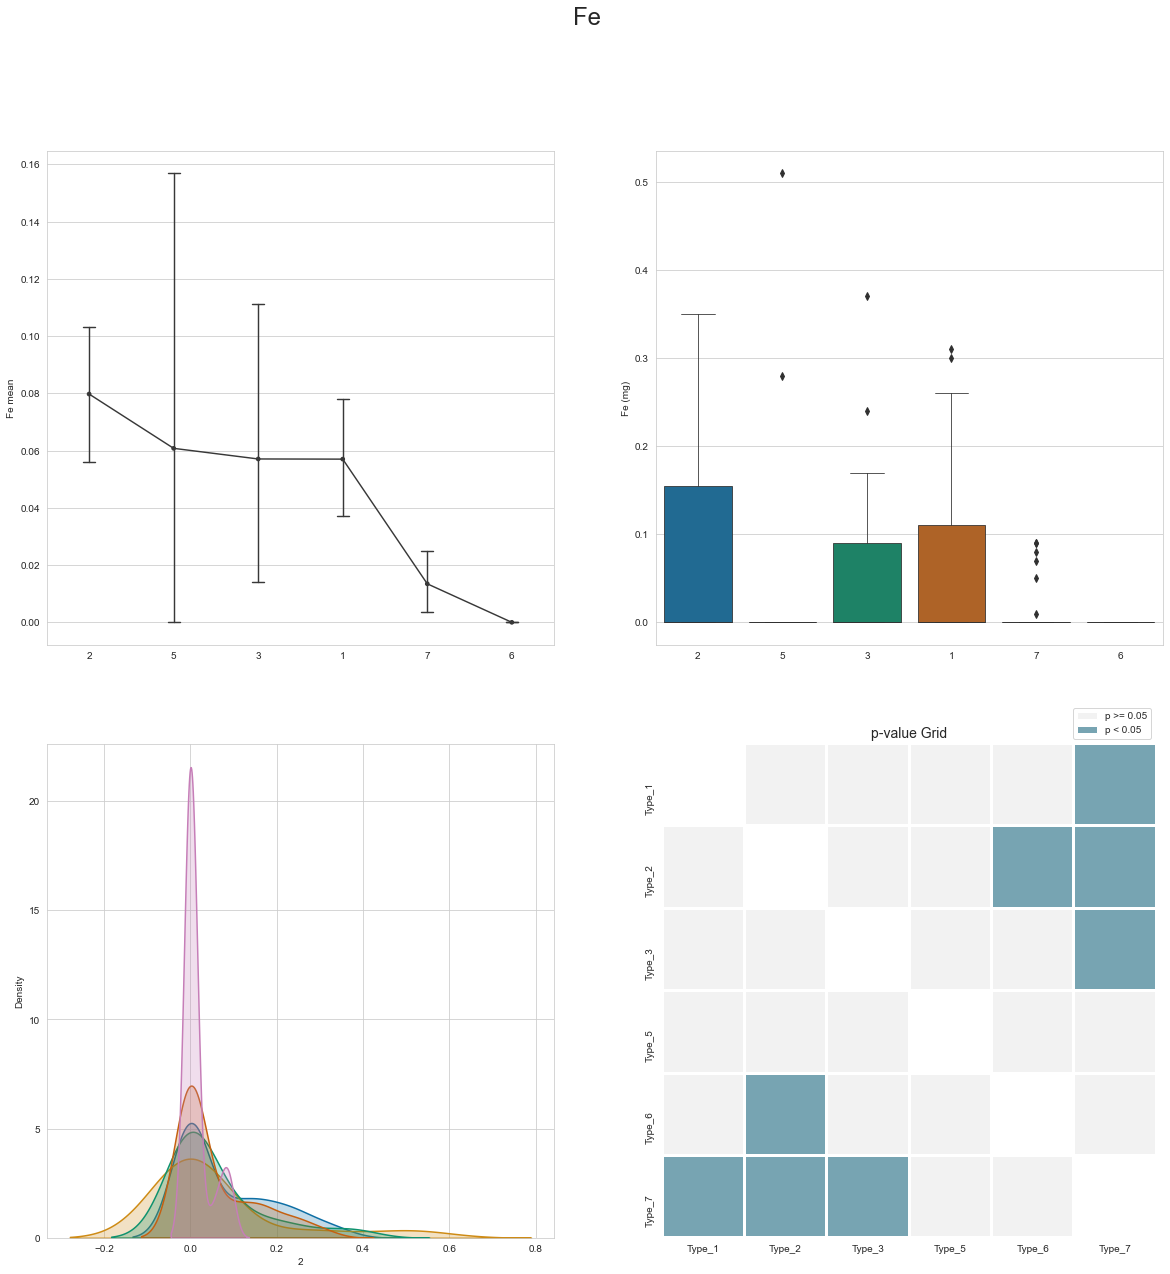

,F score,p-value
Fe,2.71,0.02


In [21]:
display_multi_category_x_numeric_analysis(df,target,next(i))

First of all, none of the features are normally distributed. The features `Fe`, `Ba`, `Ca` and `K` exhibit the highest *skew coefficients*. Moreover, `K` and `Ba` distribution seem to contain **many outliers**.

- **RI** lies between `1.51` and `1.54`.
- Type `6` and `7` have higher **Na** percentage
- Type `1`,`2` and `3` have higher **Mg** percentage
- Type `5` and `7` have higher **Al** percentage
- **Si** percentage is similar in all types
- Type `6` has no **K** composition
- Type `5` and `6` have higher **Ca** composition
- **Ba** is mostly used in Type `7`
- **Fe** is used in Type `1`,`2` and `3`

Furthermore, with the **p-value statistical hypothesis testing**, despite **RI**, which classifies it as `Type 7`, all other features could belong to more than one classification type. For this reason, it requires some `normalization` to reduce `ambiguity`.

# <a name="p7">Data Cleaning</a>

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population that could be either positive or negative values; it can bias our results wrongly.

I created a function to detect observations with more than one outlier, this function takes the dataframe `df` of features and returns a list of indices corresponding to the observations containing more than 1 outlier.

In [22]:
def outlier_hunt(df):
    
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 1 )
    
    return multiple_outliers   

print('The dataset contains %d observations with multiple outliers' %(len(outlier_hunt(df[features])))) 

The dataset contains 35 observations with multiple outliers


There are some 35 observations with multiple outliers. These could harm the efficiency of my learning algorithms. I will try three different approaches `Boxplot`, `Box-Cox` and `SMOTE`, then I will decide on what suits best to this problem.

## Boxplot

The box plot is a useful graphical display for describing the behavior of the data in the middle as well as at the ends of the distributions. The box plot uses the median and the lower and upper quartiles (defined as the 25th and 75th percentiles). If the lower quartile is Q1 and the upper quartile is Q3, then the difference (Q3 - Q1) is called the interquartile range or IQ.

A box plot is constructed by drawing a box between the upper and lower quartiles with a solid line drawn across the box to locate the median. The following quantities (called fences) are needed for identifying extreme values in the tails of the distribution:

- lower inner fence: Q1 - 1.5*IQ
- upper inner fence: Q3 + 1.5*IQ
- lower outer fence: Q1 - 3*IQ
- upper outer fence: Q3 + 3*IQ

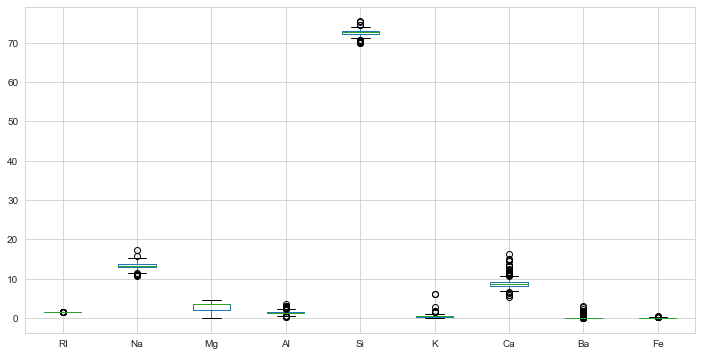

In [23]:
df.iloc[:,:-1].boxplot(figsize=(12,6))
plt.show()

- Silicon(Si) is the main component of Glass making more than 70% of composition
- Combined Silicon(Si), Sodium(Na) and Calcium(K) make up around 90%
- Iron(Fe) is the least important component

# Hunting and removing multiple outliers
Let's remove the observations containing multiple outliers with the function we created in the previous section.

In [24]:
outlier_indices = outlier_hunt(df[features])
df = df.drop(outlier_indices).reset_index(drop=True)
print(df.shape)
print(df)

(179, 10)
          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
174  1.51645  14.94  0.00  1.87  73.11  0.00  8.67  1.38  0.0     7
175  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
176  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
177  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
178  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[179 rows x 10 columns]


Removing observations with multiple outliers leaves us with **179 observations** to learn from. So, from 214 observations we reduced **45 outliers**, Not that much! 

## Box-Cox
Let's examine if a Box-Cox transform can contribute to the normalization of some features. It should be emphasized that all transformations should only be done on the training set to avoid data snooping. Otherwise the test error estimation will be biased.

In [25]:
features_boxcox = []

for feature in features:
    bc_transformed, _ = boxcox(df[feature]+1)  # shift by 1 to avoid computing log of negative values
    features_boxcox.append(bc_transformed)

features_boxcox = np.column_stack(features_boxcox)
df_bc = pd.DataFrame(data=features_boxcox, columns=features)
df_bc['Type'] = df['Type']

df_bc.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.000534,0.243356,119.687966,1.229339,1.721232e+34,0.063377,0.208206,0.0,0.0,1
1,0.000534,0.243356,63.678038,1.550424,2.204289e+34,0.720776,0.208204,0.0,0.0,1
2,0.000534,0.243356,61.239901,1.778303,2.357376e+34,0.545498,0.208204,0.0,0.0,1
3,0.000534,0.243356,68.240573,1.463014,2.136856e+34,0.916864,0.208205,0.0,0.0,1
4,0.000534,0.243356,64.672462,1.401007,2.412676e+34,0.871436,0.208205,0.0,0.0,1


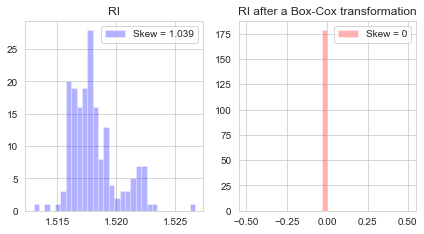

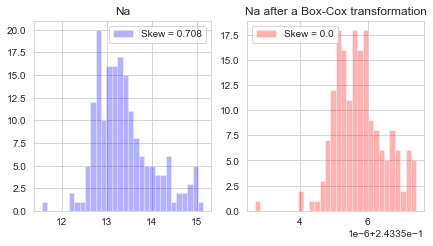

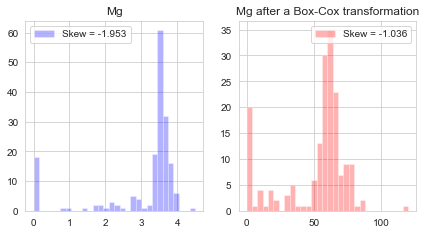

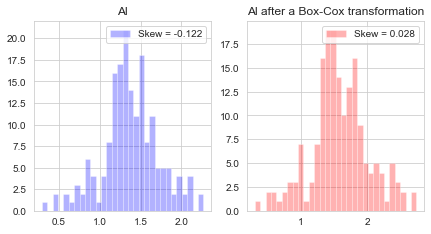

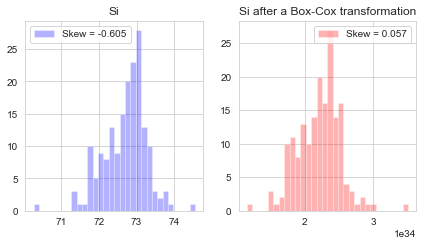

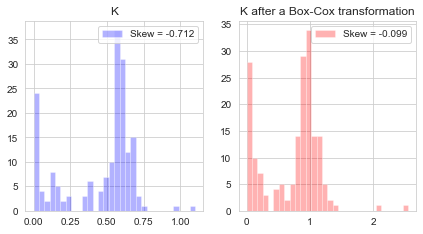

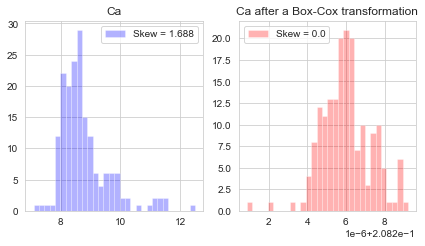

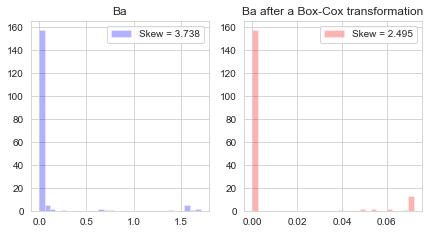

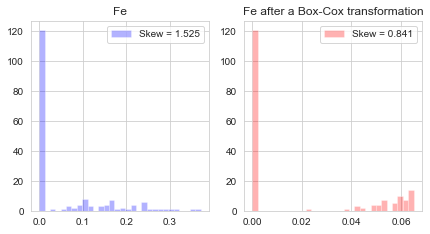

In [26]:
for feature in features:
    fig, ax = plt.subplots(1,2,figsize=(7,3.5))    
    ax[0].hist(df[feature], color='blue', bins=30, alpha=0.3, label='Skew = %s' %(str(round(df[feature].skew(),3))) )
    ax[0].set_title(str(feature))   
    ax[0].legend(loc=0)
    ax[1].hist(df_bc[feature], color='red', bins=30, alpha=0.3, label='Skew = %s' %(str(round(df_bc[feature].skew(),3))) )
    ax[1].set_title(str(feature)+' after a Box-Cox transformation')
    ax[1].legend(loc=0)
    plt.show()

In [27]:
# check if skew is closer to zero after a box-cox transform
for feature in features:
    delta = np.abs( df_bc[feature].skew() / df[feature].skew() )
    if delta < 1.0 :
        print("Feature\033[1m %s\033[0m is less skewed after a Box-Cox transform" %(feature))
    else:
        print('Feature %s is more skewed after a Box-Cox transform'  %(feature))

Feature RI is less skewed after a Box-Cox transform
Feature Na is less skewed after a Box-Cox transform
Feature Mg is less skewed after a Box-Cox transform
Feature Al is less skewed after a Box-Cox transform
Feature Si is less skewed after a Box-Cox transform
Feature K is less skewed after a Box-Cox transform
Feature Ca is less skewed after a Box-Cox transform
Feature Ba is less skewed after a Box-Cox transform
Feature Fe is less skewed after a Box-Cox transform


The Box-Cox transform seems to do a good job in reducing the skews of the different distributions of features. However, it **does not** lead to the normalization of the feature distributions. 

 **Final Decision: Outliers**

Although I am not using a large dataset, types `1` and `2` have more than double the others, which would not suit the algorithm I plan to use. For this reason, `I will remove all outliers`.

# <a name="p8">Data Modelling</a>

As I predict which type of Glass is, I will split the data to find our target classification label. **X** for all columns and **y** only for the `Type` one.

In [28]:
X= df.drop("Type", 1)
y = df['Type']

I created a bar chart to visualise the Type column breakdown; it can give me a clear idea that classes `0` and `1` still have many more examples than the other classes.

Class=1, n=68 (37.989%)
Class=2, n=66 (36.872%)
Class=3, n=17 (9.497%)
Class=5, n=6 (3.352%)
Class=6, n=8 (4.469%)
Class=7, n=14 (7.821%)


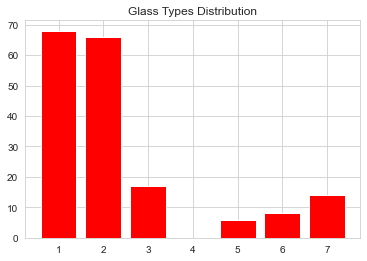

In [29]:
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values(), color='red')
plt.title("Glass Types Distribution")
plt.show()

## SMOTE (Synthetic Minority Over-sampling Technique)

I tried to get rid of the `outliers` and use the `box-cox` but, they do not solve the `features normalization distribution` problem. One of the methods that can be used to eliminate the imbalance in the data set is `resampling`. It has two methods:

- The first method is to obtain classes with an equal number of data by increasing the data of minority classes with various methods. It is called Oversampling.

- Another method is to obtain a balanced data set by extracting the data belonging to the weighted class from the data set. It is referred to as the Undersampling process.

The `oversampling` method was preferred because the number of samples in the data set used is small and the undersampling process will cause data loss. In order to apply this method, the **SMOTE** technique in the imbalanced-learn library was used and synthetic data belonging to the minority classes were produced.

In [30]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

**SMOTE** will oversample all classes to have the same number of examples as the class with most examples; in this case,  `class 1` has the most examples with `68`. Therefore, it will oversample `all classes` to have `68` examples as well.

Class=0, n=68 (16.667%)
Class=1, n=68 (16.667%)
Class=2, n=68 (16.667%)
Class=3, n=68 (16.667%)
Class=4, n=68 (16.667%)
Class=5, n=68 (16.667%)


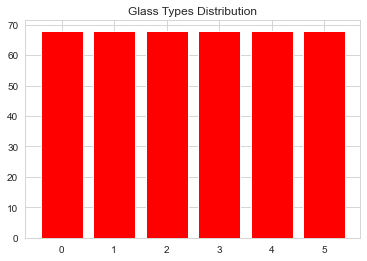

In [31]:
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values(), color='red')
plt.title("Glass Types Distribution")
plt.show()

Use variable `totCol` to hold the number of columns in the dataframe. Set up variable `totAttr` for the total number of attribute columns. `targetCol` variable indicates the column location of the target/class variable:

- If the first column, set targetCol to 1. If the last column, set targetCol to totCol
- If (targetCol <> 1) and (targetCol <> totCol), be aware when slicing up the dataframes for visualization

In [32]:
totCol = len(df.columns)

totAttr = totCol-1

targetCol = totCol

I created `X_original` and `y_original`, for cleaning/transformation operations

In [33]:
if targetCol == totCol:
    X_original = X
    y_original = y
else:
    X_original = df.iloc[:,1:totCol]
    y_original = df['RI']

print("df.shape: {} X_original.shape: {} y_original.shape: {}".format(df.shape, X_original.shape, y_original.shape))

df.shape: (179, 10) X_original.shape: (408, 9) y_original.shape: (408,)


Apply feature scaling and transformation

In [34]:
from sklearn import preprocessing

preprocessing.scale(X_original, copy=False)

array([[ 1.41514907,  0.08691814,  1.53861353, ..., -0.447634  ,
        -0.40441127, -0.46716426],
       [-0.38931732,  0.40785609,  0.94598975, ..., -1.23740222,
        -0.40441127, -0.46716426],
       [-1.14825466, -0.05429456,  0.91269628, ..., -1.2803244 ,
        -0.40441127, -0.46716426],
       ...,
       [-0.98974283,  1.71615899, -1.45114012, ..., -0.59014458,
         2.46499717, -0.46716426],
       [ 0.66610237,  1.01773969, -1.45114012, ..., -0.70503139,
         2.79967166, -0.46716426],
       [-0.96543335,  1.75689443, -1.45114012, ..., -0.52071861,
         2.3499948 , -0.46716426]])

**One-hot-encoding**

One hot encoding is a process by which `categorical variables` are converted into a form that could be provided to Machine Learning algorithms to do a better job. Basically, we convert `plain text` into a matrix of `1s` and `0s`.

In [35]:
from keras.utils import np_utils

encoder = preprocessing.LabelEncoder()
encoder.fit(y_original)
y_transformed = encoder.transform(y_original)
y_encoded = np_utils.to_categorical(y_transformed)
print(y_encoded)

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


#### Split the dataset

I split the dataset in `70% training` and `30% testing`.

In [36]:
splitDataset = True
splitPercentage = 0.30
seedNum = 888

X_encoded = X_original.values
if (splitDataset):
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=splitPercentage, random_state=seedNum)
else:
    X_train, y_train = X_encoded, y_encoded
    X_test, y_test = X_encoded, y_encoded
print("X_train.shape: {} X_train.type: {}".format(X_train.shape, type(X_train)))
print("y_train.shape: {} y_train.type: {}".format(y_train.shape, type(y_train)))
print("X_test.shape: {} X_test.type: {}".format(X_test.shape, type(X_test)))
print("y_test.shape: {} y_test.type: {}".format(y_test.shape, type(y_test)))

<IPython.core.display.Javascript object>

X_train.shape: (285, 9) X_train.type: <class 'numpy.ndarray'>
y_train.shape: (285, 6) y_train.type: <class 'numpy.ndarray'>
X_test.shape: (123, 9) X_test.type: <class 'numpy.ndarray'>
y_test.shape: (123, 6) y_test.type: <class 'numpy.ndarray'>


# <a name="p9">Deep Learning Implementation</a>

For this task, I decided to use Keras because it is a model-level library, providing high-level building blocks for developing deep-learning models, and it is easier to use than other technologies.

The typical Keras workflow looks just like this: 

1. Define your training data: input tensors and target tensors.
2. Define a network of layers (or model ) that maps your inputs to your targets.
3. Configure the learning process by choosing a loss function, an optimizer, and some metrics to monitor. 
4. Iterate on your training data by calling the fit() method of your model.

### First Attempt

I tried different layers, activation and loss functions, and optimizers. But, according to `Francois Chollet`, the Keras creator, in his book `Deep Learning with Python, 2018` the proper configuration for a Multiclass, single-label classification uses "softmax" activation and "categorical_crossentropy" loss function.  

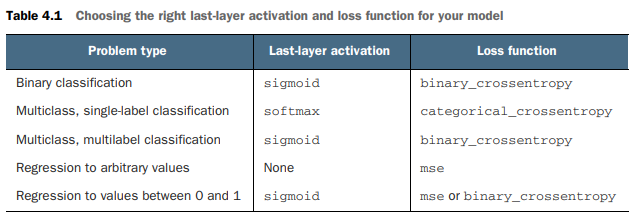
                      **Source:** Deep Learning with Python, Francois Chollet, 2018. Chapter 4, p.114


And I tried **RMSprop** optimizer to speed up the algorithm learning training I learned in `Vitaly Bushaev's article`; he says `RMSprop` does not work when we have massive datasets and need to perform mini-batch weights updates, which is what I need for this measly 179-lines-tiny-dataset. In his article, he brings up an excellent visualization of these optimizers comparison as follows:
**Source:** https://imgur.com/a/Hqolp#NKsFHJb

In [37]:
from IPython.display import Image
Image(url='https://miro.medium.com/max/620/1*Y2KPVGrVX9MQkeI8Yjy59Q.gif') 

The image shows the `RMSprop` optimizer working on a small dataset; although it seems `NAG` crossing the line first, it also looks a bit lost initially, while `RMSprop` goes straight down.

In [57]:
first = Sequential()
first.add(Dense(24, input_dim=9, kernel_initializer='normal', activation='relu'))
first.add(Dropout(0.3))
first.add(Dense(6, kernel_initializer='normal', activation='softmax'))
first.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
first.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 24)                240       
_________________________________________________________________
dropout_3 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 150       
Total params: 390
Trainable params: 390
Non-trainable params: 0
_________________________________________________________________


I used this Network structure because I do not need many layers as my data is small. During my setup stage, I faced underfitting and overfitting problems with training data. 

`Underfitting` - the model performs poorly on the training data.

`Overfitting` - the model performs well on the training data but does not perform well on the evaluation data. The model is memorizing the data it has seen and is unable to generalize to unseen examples.

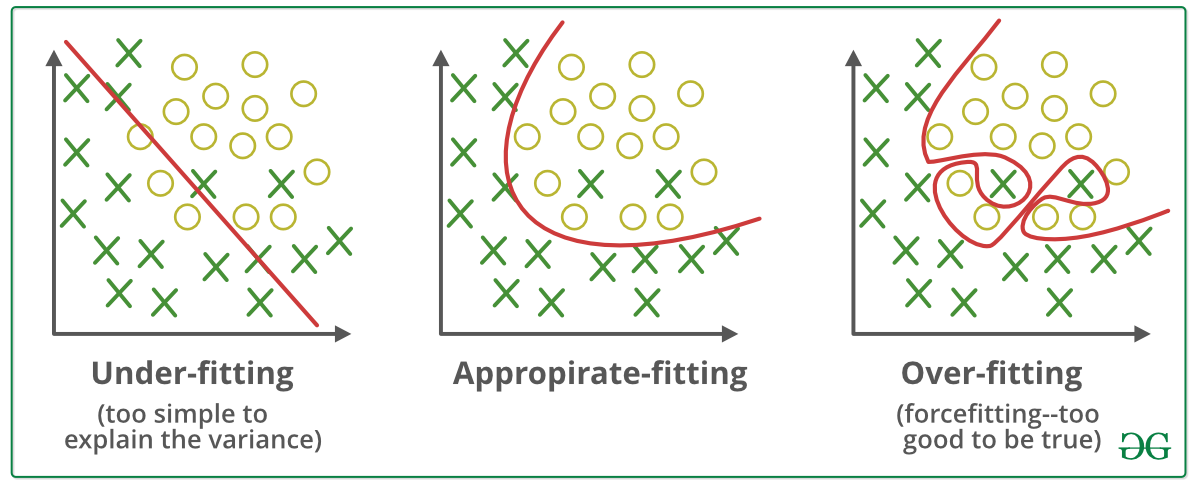

**Source:** https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/

In [58]:
hist1 = first.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=800, batch_size=30, verbose=1)

Epoch 1/800
10/10 [==============================] - 1s 33ms/step - loss: 1.7509 - accuracy: 0.3788 - val_loss: 1.7195 - val_accuracy: 0.5935
Epoch 2/800
10/10 [==============================] - 0s 8ms/step - loss: 1.7175 - accuracy: 0.5245 - val_loss: 1.6815 - val_accuracy: 0.6504
Epoch 3/800
10/10 [==============================] - 0s 8ms/step - loss: 1.6594 - accuracy: 0.6132 - val_loss: 1.6408 - val_accuracy: 0.7073
Epoch 4/800
10/10 [==============================] - 0s 8ms/step - loss: 1.6286 - accuracy: 0.5934 - val_loss: 1.5957 - val_accuracy: 0.6748
Epoch 5/800
10/10 [==============================] - 0s 8ms/step - loss: 1.5845 - accuracy: 0.6524 - val_loss: 1.5435 - val_accuracy: 0.6585
Epoch 6/800
10/10 [==============================] - 0s 8ms/step - loss: 1.5119 - accuracy: 0.6288 - val_loss: 1.4918 - val_accuracy: 0.6260
Epoch 7/800
10/10 [==============================] - 0s 6ms/step - loss: 1.4754 - accuracy: 0.6052 - val_loss: 1.4372 - val_accuracy: 0.6341
Epoch 8/800


Epoch 59/800
10/10 [==============================] - 0s 9ms/step - loss: 0.5546 - accuracy: 0.7963 - val_loss: 0.5586 - val_accuracy: 0.8455
Epoch 60/800
10/10 [==============================] - 0s 7ms/step - loss: 0.5776 - accuracy: 0.7571 - val_loss: 0.5575 - val_accuracy: 0.8293
Epoch 61/800
10/10 [==============================] - 0s 8ms/step - loss: 0.5453 - accuracy: 0.7661 - val_loss: 0.5542 - val_accuracy: 0.8374
Epoch 62/800
10/10 [==============================] - 0s 8ms/step - loss: 0.5766 - accuracy: 0.7591 - val_loss: 0.5519 - val_accuracy: 0.8293
Epoch 63/800
10/10 [==============================] - 0s 7ms/step - loss: 0.4756 - accuracy: 0.8258 - val_loss: 0.5494 - val_accuracy: 0.8293
Epoch 64/800
10/10 [==============================] - 0s 7ms/step - loss: 0.5510 - accuracy: 0.7283 - val_loss: 0.5455 - val_accuracy: 0.8374
Epoch 65/800
10/10 [==============================] - 0s 8ms/step - loss: 0.5575 - accuracy: 0.7420 - val_loss: 0.5426 - val_accuracy: 0.8293
Epoch 

10/10 [==============================] - 0s 6ms/step - loss: 0.3691 - accuracy: 0.8573 - val_loss: 0.3463 - val_accuracy: 0.8780
Epoch 174/800
10/10 [==============================] - 0s 9ms/step - loss: 0.4151 - accuracy: 0.8182 - val_loss: 0.3475 - val_accuracy: 0.8780
Epoch 175/800
10/10 [==============================] - 0s 7ms/step - loss: 0.3768 - accuracy: 0.8519 - val_loss: 0.3463 - val_accuracy: 0.8780
Epoch 176/800
10/10 [==============================] - 0s 7ms/step - loss: 0.4009 - accuracy: 0.8214 - val_loss: 0.3452 - val_accuracy: 0.8780
Epoch 177/800
10/10 [==============================] - 0s 7ms/step - loss: 0.3979 - accuracy: 0.8552 - val_loss: 0.3444 - val_accuracy: 0.8780
Epoch 178/800
10/10 [==============================] - 0s 7ms/step - loss: 0.3647 - accuracy: 0.8352 - val_loss: 0.3440 - val_accuracy: 0.8780
Epoch 179/800
10/10 [==============================] - 0s 7ms/step - loss: 0.3540 - accuracy: 0.8436 - val_loss: 0.3421 - val_accuracy: 0.8780
Epoch 180/800

10/10 [==============================] - 0s 8ms/step - loss: 0.3331 - accuracy: 0.8624 - val_loss: 0.3051 - val_accuracy: 0.8780
Epoch 231/800
10/10 [==============================] - 0s 7ms/step - loss: 0.3507 - accuracy: 0.8583 - val_loss: 0.3043 - val_accuracy: 0.8699
Epoch 232/800
10/10 [==============================] - 0s 7ms/step - loss: 0.2854 - accuracy: 0.8949 - val_loss: 0.3030 - val_accuracy: 0.8699
Epoch 233/800
10/10 [==============================] - 0s 7ms/step - loss: 0.3327 - accuracy: 0.8789 - val_loss: 0.3026 - val_accuracy: 0.8699
Epoch 234/800
10/10 [==============================] - 0s 8ms/step - loss: 0.3103 - accuracy: 0.8786 - val_loss: 0.3020 - val_accuracy: 0.8780
Epoch 235/800
10/10 [==============================] - 0s 12ms/step - loss: 0.2797 - accuracy: 0.9204 - val_loss: 0.3015 - val_accuracy: 0.8862
Epoch 236/800
10/10 [==============================] - 0s 8ms/step - loss: 0.3127 - accuracy: 0.8976 - val_loss: 0.3003 - val_accuracy: 0.8699
Epoch 237/80

10/10 [==============================] - 0s 7ms/step - loss: 0.2926 - accuracy: 0.8963 - val_loss: 0.2657 - val_accuracy: 0.8780
Epoch 345/800
10/10 [==============================] - 0s 8ms/step - loss: 0.2670 - accuracy: 0.9226 - val_loss: 0.2668 - val_accuracy: 0.8780
Epoch 346/800
10/10 [==============================] - 0s 8ms/step - loss: 0.2913 - accuracy: 0.8787 - val_loss: 0.2684 - val_accuracy: 0.8780
Epoch 347/800
10/10 [==============================] - 0s 8ms/step - loss: 0.2337 - accuracy: 0.9046 - val_loss: 0.2667 - val_accuracy: 0.8780
Epoch 348/800
10/10 [==============================] - 0s 8ms/step - loss: 0.2034 - accuracy: 0.9420 - val_loss: 0.2668 - val_accuracy: 0.8780
Epoch 349/800
10/10 [==============================] - 0s 7ms/step - loss: 0.2792 - accuracy: 0.9076 - val_loss: 0.2671 - val_accuracy: 0.8780
Epoch 350/800
10/10 [==============================] - 0s 7ms/step - loss: 0.2893 - accuracy: 0.8822 - val_loss: 0.2652 - val_accuracy: 0.8780
Epoch 351/800

10/10 [==============================] - 0s 7ms/step - loss: 0.2125 - accuracy: 0.9085 - val_loss: 0.2350 - val_accuracy: 0.8943
Epoch 459/800
10/10 [==============================] - 0s 8ms/step - loss: 0.2444 - accuracy: 0.9138 - val_loss: 0.2341 - val_accuracy: 0.8943
Epoch 460/800
10/10 [==============================] - 0s 8ms/step - loss: 0.2403 - accuracy: 0.9169 - val_loss: 0.2332 - val_accuracy: 0.8943
Epoch 461/800
10/10 [==============================] - 0s 7ms/step - loss: 0.2570 - accuracy: 0.9039 - val_loss: 0.2339 - val_accuracy: 0.8943
Epoch 462/800
10/10 [==============================] - 0s 7ms/step - loss: 0.2201 - accuracy: 0.9369 - val_loss: 0.2327 - val_accuracy: 0.8943
Epoch 463/800
10/10 [==============================] - 0s 7ms/step - loss: 0.2040 - accuracy: 0.9264 - val_loss: 0.2325 - val_accuracy: 0.8943
Epoch 464/800
10/10 [==============================] - 0s 7ms/step - loss: 0.2644 - accuracy: 0.9122 - val_loss: 0.2320 - val_accuracy: 0.8943
Epoch 465/800

10/10 [==============================] - 0s 7ms/step - loss: 0.2284 - accuracy: 0.8938 - val_loss: 0.2084 - val_accuracy: 0.9106
Epoch 573/800
10/10 [==============================] - 0s 7ms/step - loss: 0.1911 - accuracy: 0.9355 - val_loss: 0.2082 - val_accuracy: 0.9106
Epoch 574/800
10/10 [==============================] - 0s 7ms/step - loss: 0.2457 - accuracy: 0.9043 - val_loss: 0.2085 - val_accuracy: 0.9106
Epoch 575/800
10/10 [==============================] - 0s 7ms/step - loss: 0.2360 - accuracy: 0.9025 - val_loss: 0.2089 - val_accuracy: 0.9024
Epoch 576/800
10/10 [==============================] - 0s 9ms/step - loss: 0.2483 - accuracy: 0.9010 - val_loss: 0.2089 - val_accuracy: 0.9024
Epoch 577/800
10/10 [==============================] - 0s 7ms/step - loss: 0.2446 - accuracy: 0.9207 - val_loss: 0.2117 - val_accuracy: 0.9024
Epoch 578/800
10/10 [==============================] - 0s 7ms/step - loss: 0.2361 - accuracy: 0.8989 - val_loss: 0.2095 - val_accuracy: 0.9024
Epoch 579/800

10/10 [==============================] - 0s 7ms/step - loss: 0.2585 - accuracy: 0.8875 - val_loss: 0.1946 - val_accuracy: 0.9106
Epoch 687/800
10/10 [==============================] - 0s 7ms/step - loss: 0.1650 - accuracy: 0.9586 - val_loss: 0.1965 - val_accuracy: 0.9106
Epoch 688/800
10/10 [==============================] - 0s 7ms/step - loss: 0.2585 - accuracy: 0.9009 - val_loss: 0.1962 - val_accuracy: 0.9024
Epoch 689/800
10/10 [==============================] - 0s 9ms/step - loss: 0.2119 - accuracy: 0.9300 - val_loss: 0.1955 - val_accuracy: 0.9106
Epoch 690/800
10/10 [==============================] - 0s 8ms/step - loss: 0.1956 - accuracy: 0.9384 - val_loss: 0.1961 - val_accuracy: 0.9106
Epoch 691/800
10/10 [==============================] - 0s 8ms/step - loss: 0.2374 - accuracy: 0.9207 - val_loss: 0.1958 - val_accuracy: 0.9024
Epoch 692/800
10/10 [==============================] - 0s 7ms/step - loss: 0.2056 - accuracy: 0.9251 - val_loss: 0.1957 - val_accuracy: 0.9106
Epoch 693/800

10/10 [==============================] - 0s 7ms/step - loss: 0.2142 - accuracy: 0.9247 - val_loss: 0.1849 - val_accuracy: 0.9187


In [59]:
# Evaluate the Keras model on previously unseen data
scores = first.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (first.metrics_names[1], scores[1]*100))
print("\n%s: %.2f" % (first.metrics_names[0], scores[0]))

4/4 [==============================] - 0s 2ms/step - loss: 0.1849 - accuracy: 0.9187

accuracy: 91.87%

loss: 0.18


It was challenging to set up the correct `epochs` and `batch size`, but I got initially **~91.87%** `accuracy` and a **~0.18** `loss` after many trials (This result might alter in different machines).

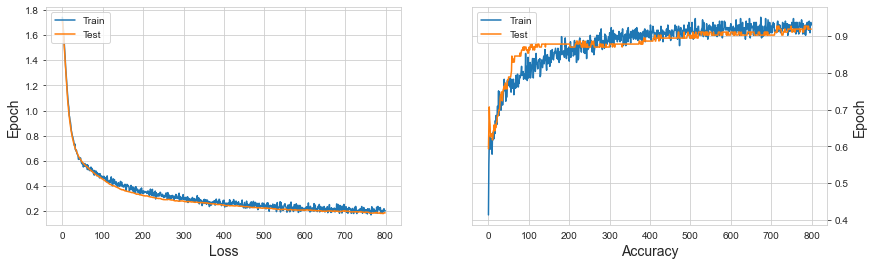

In [60]:
f, axes = plt.subplots(1,2,figsize=(14,4))

axes[0].plot(hist1.history['loss'])
axes[0].plot(hist1.history['val_loss'])
axes[0].set_xlabel('Loss', fontsize=14)
axes[0].set_ylabel('Epoch', fontsize=14)
axes[0].yaxis.tick_left()
axes[0].legend(['Train', 'Test'], loc='upper left')

axes[1].plot(hist1.history['accuracy'])
axes[1].plot(hist1.history['val_accuracy'])
axes[1].set_xlabel('Accuracy', fontsize=14)
axes[1].set_ylabel('Epoch', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(['Train', 'Test'], loc='upper left')

plt.show()

In my opinion, it was challenging to set up the network; working with Keras, there is no ready recipe, I had to experiment with different architectures, and clearly, `this small dataset does not perform well on the multiple-layered network`.
When I tried to do that, I faced **underfitting** problems, which means that the training data does not learn much, resulting in poor performance on training; the algorithm could neither model the training data nor generalize to new data.

Otherwise, when I reduced the network, I faced **overfitting** problems. When a model learns the detail and noise in the training data, it impacts the model's performance on new data, making it generalize the classification negatively. To solve this, I adjusted it using the `Dropout layer` with `30%`; it is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly. (Brownlee, 2021)

It means that their contribution to the activation of downstream neurons is temporally removed on the forward pass, and any weight updates are not applied to the neuron on the backward pass. By doing that, I reduced the noise on training data, and I managed to flatten the curve.

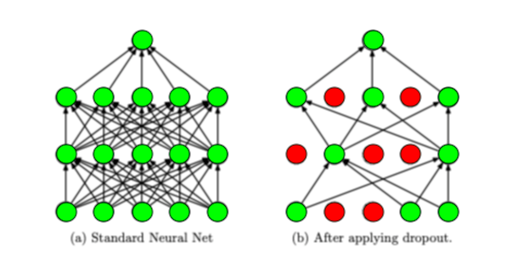
**Source:** https://medium.com/analytics-vidhya/a-simple-introduction-to-dropout-regularization-with-code-5279489dda1e

In [61]:
# Make class predictions with the model
predictions = first.predict_classes(X_test)

# Summarize the first 20 cases
for i in range(20):
    if encoder.inverse_transform([predictions[i]]) == encoder.inverse_transform([np.argmax(y_test[i])]) :
        print("Predicted Right")
    else:
        print('\033[1m' + "*** Predicted Wrong ***" + '\033[0m')
    print('Data item #%d predicted to be %s (expected %s)\n' % (i, encoder.inverse_transform([predictions[i]]), encoder.inverse_transform([np.argmax(y_test[i])])))

Predicted Right
Data item #0 predicted to be [4] (expected [4])

Predicted Right
Data item #1 predicted to be [2] (expected [2])

Predicted Right
Data item #2 predicted to be [5] (expected [5])

*** Predicted Wrong ***
Data item #3 predicted to be [1] (expected [0])

Predicted Right
Data item #4 predicted to be [4] (expected [4])

Predicted Right
Data item #5 predicted to be [5] (expected [5])

Predicted Right
Data item #6 predicted to be [5] (expected [5])

Predicted Right
Data item #7 predicted to be [4] (expected [4])

Predicted Right
Data item #8 predicted to be [1] (expected [1])

Predicted Right
Data item #9 predicted to be [1] (expected [1])

Predicted Right
Data item #10 predicted to be [1] (expected [1])

Predicted Right
Data item #11 predicted to be [5] (expected [5])

Predicted Right
Data item #12 predicted to be [0] (expected [0])

Predicted Right
Data item #13 predicted to be [4] (expected [4])

Predicted Right
Data item #14 predicted to be [0] (expected [0])

Predicted Ri

The model could predict `18` out of `20 predictions`. Still, my task in this project is to enhance this model, so I will architect another structure to `increase accuracy`, `reduce loss`, and `predict more accurately`.

#### Second Attempt


In this second attempt, I started the `neural network` with `32 neurons` instead of 24 from the previous example; I kept the activation as `relu` and the `Dropout layer` with `30%`. I also kept the `softmax` activation in the output layer; as I read in **Francois Chollet book**, it is a good structure for the problem I tried to solve.

However,  I chose **SGD**, which stands for `Stochastic Gradient Descent`; it is an optimization algorithm that follows the negative gradient of an objective function to locate the function's minimum. A limitation of gradient descent is that it can get stuck in flat areas or bounce around if the objective function returns noisy gradients. 

Meanwhile, `Momentum` is an approach that accelerates the progress of the search to skim across flat areas and smooth out bouncy gradients but in some cases, the acceleration of Momentum can cause the search to miss or overshoot the minima at the bottom of basins or valleys.

`Nesterov momentum` is an extension of Momentum that involves calculating the decaying moving average of the gradients of projected positions in the search space rather than the actual positions themselves.
It has the effect of harnessing the accelerating benefits of Momentum whilst allowing the search to slow down when approaching the optima and reduce the likelihood of missing or overshooting it. (Brownlee, 2021)

In [118]:
second = Sequential()
second.add(Dense(32, input_dim=9, kernel_initializer='normal', activation='relu'))
second.add(Dropout(0.3))
second.add(Dense(6, kernel_initializer='normal', activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
second.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
second.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 32)                320       
_________________________________________________________________
dropout_16 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 6)                 198       
Total params: 518
Trainable params: 518
Non-trainable params: 0
_________________________________________________________________


In [119]:
hist2 = second.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=800, batch_size=30, verbose=1)

Epoch 1/800
10/10 [==============================] - 1s 33ms/step - loss: 1.7992 - accuracy: 0.0779 - val_loss: 1.7778 - val_accuracy: 0.2439
Epoch 2/800
10/10 [==============================] - 0s 7ms/step - loss: 1.7745 - accuracy: 0.2161 - val_loss: 1.7384 - val_accuracy: 0.4309
Epoch 3/800
10/10 [==============================] - 0s 7ms/step - loss: 1.7249 - accuracy: 0.4624 - val_loss: 1.6804 - val_accuracy: 0.5122
Epoch 4/800
10/10 [==============================] - 0s 8ms/step - loss: 1.6773 - accuracy: 0.5080 - val_loss: 1.5991 - val_accuracy: 0.5366
Epoch 5/800
10/10 [==============================] - 0s 8ms/step - loss: 1.5802 - accuracy: 0.5152 - val_loss: 1.4968 - val_accuracy: 0.5366
Epoch 6/800
10/10 [==============================] - 0s 8ms/step - loss: 1.4931 - accuracy: 0.5515 - val_loss: 1.3881 - val_accuracy: 0.5772
Epoch 7/800
10/10 [==============================] - 0s 8ms/step - loss: 1.3730 - accuracy: 0.6504 - val_loss: 1.2606 - val_accuracy: 0.6098
Epoch 8/800


Epoch 59/800
10/10 [==============================] - 0s 8ms/step - loss: 0.4177 - accuracy: 0.8337 - val_loss: 0.4212 - val_accuracy: 0.8618
Epoch 60/800
10/10 [==============================] - 0s 6ms/step - loss: 0.4612 - accuracy: 0.8151 - val_loss: 0.4123 - val_accuracy: 0.8537
Epoch 61/800
10/10 [==============================] - 0s 7ms/step - loss: 0.4567 - accuracy: 0.8465 - val_loss: 0.4061 - val_accuracy: 0.8618
Epoch 62/800
10/10 [==============================] - 0s 7ms/step - loss: 0.3839 - accuracy: 0.8593 - val_loss: 0.4048 - val_accuracy: 0.8699
Epoch 63/800
10/10 [==============================] - 0s 7ms/step - loss: 0.4303 - accuracy: 0.8733 - val_loss: 0.3994 - val_accuracy: 0.8699
Epoch 64/800
10/10 [==============================] - 0s 8ms/step - loss: 0.4034 - accuracy: 0.8421 - val_loss: 0.3969 - val_accuracy: 0.8780
Epoch 65/800
10/10 [==============================] - 0s 7ms/step - loss: 0.4249 - accuracy: 0.8396 - val_loss: 0.3938 - val_accuracy: 0.8780
Epoch 

10/10 [==============================] - 0s 7ms/step - loss: 0.3085 - accuracy: 0.8717 - val_loss: 0.2574 - val_accuracy: 0.8862
Epoch 174/800
10/10 [==============================] - 0s 8ms/step - loss: 0.2267 - accuracy: 0.9189 - val_loss: 0.2573 - val_accuracy: 0.8862
Epoch 175/800
10/10 [==============================] - 0s 8ms/step - loss: 0.2812 - accuracy: 0.9056 - val_loss: 0.2522 - val_accuracy: 0.9024
Epoch 176/800
10/10 [==============================] - 0s 8ms/step - loss: 0.2989 - accuracy: 0.9038 - val_loss: 0.2573 - val_accuracy: 0.8943
Epoch 177/800
10/10 [==============================] - 0s 8ms/step - loss: 0.2653 - accuracy: 0.9116 - val_loss: 0.2694 - val_accuracy: 0.8862
Epoch 178/800
10/10 [==============================] - 0s 9ms/step - loss: 0.2778 - accuracy: 0.8918 - val_loss: 0.2630 - val_accuracy: 0.9024
Epoch 179/800
10/10 [==============================] - 0s 7ms/step - loss: 0.3158 - accuracy: 0.9008 - val_loss: 0.2608 - val_accuracy: 0.9024
Epoch 180/800

10/10 [==============================] - 0s 6ms/step - loss: 0.1992 - accuracy: 0.9487 - val_loss: 0.2216 - val_accuracy: 0.9106
Epoch 288/800
10/10 [==============================] - 0s 8ms/step - loss: 0.2350 - accuracy: 0.9124 - val_loss: 0.2215 - val_accuracy: 0.9024
Epoch 289/800
10/10 [==============================] - 0s 7ms/step - loss: 0.2301 - accuracy: 0.9238 - val_loss: 0.2247 - val_accuracy: 0.9106
Epoch 290/800
10/10 [==============================] - 0s 7ms/step - loss: 0.2443 - accuracy: 0.9114 - val_loss: 0.2374 - val_accuracy: 0.9024
Epoch 291/800
10/10 [==============================] - 0s 7ms/step - loss: 0.2329 - accuracy: 0.9096 - val_loss: 0.2303 - val_accuracy: 0.9024
Epoch 292/800
10/10 [==============================] - 0s 6ms/step - loss: 0.2056 - accuracy: 0.9651 - val_loss: 0.2258 - val_accuracy: 0.9024
Epoch 293/800
10/10 [==============================] - 0s 7ms/step - loss: 0.1853 - accuracy: 0.9150 - val_loss: 0.2231 - val_accuracy: 0.8943
Epoch 294/800

10/10 [==============================] - 0s 8ms/step - loss: 0.2315 - accuracy: 0.9003 - val_loss: 0.2302 - val_accuracy: 0.9024
Epoch 402/800
10/10 [==============================] - 0s 7ms/step - loss: 0.1882 - accuracy: 0.9381 - val_loss: 0.2212 - val_accuracy: 0.9106
Epoch 403/800
10/10 [==============================] - 0s 7ms/step - loss: 0.2315 - accuracy: 0.9290 - val_loss: 0.2155 - val_accuracy: 0.9187
Epoch 404/800
10/10 [==============================] - 0s 7ms/step - loss: 0.2141 - accuracy: 0.9152 - val_loss: 0.2201 - val_accuracy: 0.9024
Epoch 405/800
10/10 [==============================] - 0s 7ms/step - loss: 0.2171 - accuracy: 0.9362 - val_loss: 0.2152 - val_accuracy: 0.9106
Epoch 406/800
10/10 [==============================] - 0s 8ms/step - loss: 0.1983 - accuracy: 0.9355 - val_loss: 0.2133 - val_accuracy: 0.9187
Epoch 407/800
10/10 [==============================] - 0s 7ms/step - loss: 0.2379 - accuracy: 0.8986 - val_loss: 0.2240 - val_accuracy: 0.9024
Epoch 408/800

10/10 [==============================] - 0s 8ms/step - loss: 0.2121 - accuracy: 0.9250 - val_loss: 0.2066 - val_accuracy: 0.9268
Epoch 516/800
10/10 [==============================] - 0s 8ms/step - loss: 0.1957 - accuracy: 0.9335 - val_loss: 0.2113 - val_accuracy: 0.9268
Epoch 517/800
10/10 [==============================] - 0s 7ms/step - loss: 0.2089 - accuracy: 0.9260 - val_loss: 0.2175 - val_accuracy: 0.9106
Epoch 518/800
10/10 [==============================] - 0s 7ms/step - loss: 0.1789 - accuracy: 0.9574 - val_loss: 0.2123 - val_accuracy: 0.9268
Epoch 519/800
10/10 [==============================] - 0s 7ms/step - loss: 0.2002 - accuracy: 0.9212 - val_loss: 0.2056 - val_accuracy: 0.9431
Epoch 520/800
10/10 [==============================] - 0s 6ms/step - loss: 0.2031 - accuracy: 0.9471 - val_loss: 0.2061 - val_accuracy: 0.9431
Epoch 521/800
10/10 [==============================] - 0s 7ms/step - loss: 0.1850 - accuracy: 0.9471 - val_loss: 0.2127 - val_accuracy: 0.9187
Epoch 522/800

Epoch 629/800
10/10 [==============================] - 0s 8ms/step - loss: 0.1804 - accuracy: 0.9552 - val_loss: 0.2090 - val_accuracy: 0.9268
Epoch 630/800
10/10 [==============================] - 0s 9ms/step - loss: 0.1564 - accuracy: 0.9512 - val_loss: 0.2105 - val_accuracy: 0.9268
Epoch 631/800
10/10 [==============================] - 0s 8ms/step - loss: 0.1837 - accuracy: 0.9356 - val_loss: 0.2085 - val_accuracy: 0.9268
Epoch 632/800
10/10 [==============================] - 0s 8ms/step - loss: 0.1569 - accuracy: 0.9432 - val_loss: 0.2051 - val_accuracy: 0.9350
Epoch 633/800
10/10 [==============================] - 0s 9ms/step - loss: 0.1797 - accuracy: 0.9449 - val_loss: 0.2108 - val_accuracy: 0.9268
Epoch 634/800
10/10 [==============================] - 0s 7ms/step - loss: 0.1439 - accuracy: 0.9539 - val_loss: 0.2064 - val_accuracy: 0.9268
Epoch 635/800
10/10 [==============================] - 0s 7ms/step - loss: 0.2078 - accuracy: 0.9361 - val_loss: 0.2106 - val_accuracy: 0.9187

10/10 [==============================] - 0s 6ms/step - loss: 0.1742 - accuracy: 0.9165 - val_loss: 0.2062 - val_accuracy: 0.9187
Epoch 744/800
10/10 [==============================] - 0s 8ms/step - loss: 0.1772 - accuracy: 0.9478 - val_loss: 0.2088 - val_accuracy: 0.9187
Epoch 745/800
10/10 [==============================] - 0s 7ms/step - loss: 0.1696 - accuracy: 0.9590 - val_loss: 0.2107 - val_accuracy: 0.9187
Epoch 746/800
10/10 [==============================] - 0s 7ms/step - loss: 0.1485 - accuracy: 0.9579 - val_loss: 0.2087 - val_accuracy: 0.9187
Epoch 747/800
10/10 [==============================] - 0s 6ms/step - loss: 0.1651 - accuracy: 0.9518 - val_loss: 0.2019 - val_accuracy: 0.9268
Epoch 748/800
10/10 [==============================] - 0s 7ms/step - loss: 0.1619 - accuracy: 0.9554 - val_loss: 0.1982 - val_accuracy: 0.9268
Epoch 749/800
10/10 [==============================] - 0s 7ms/step - loss: 0.1938 - accuracy: 0.9456 - val_loss: 0.2036 - val_accuracy: 0.9268
Epoch 750/800

In [120]:
# Evaluate the Keras model on previously unseen data
scores = second.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (second.metrics_names[1], scores[1]*100))
print("\n%s: %.2f" % (second.metrics_names[0], scores[0]))

4/4 [==============================] - 0s 6ms/step - loss: 0.1923 - accuracy: 0.9268

accuracy: 92.68%

loss: 0.19


After `800 epochs` and `batch size 30`, I got **~93%** accuracy and **~0.19** in loss, this is the best improvement I got using `SGD optimizer`.

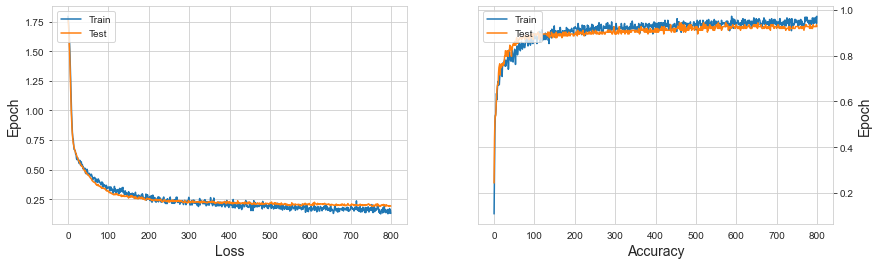

In [121]:
f, axes = plt.subplots(1,2,figsize=(14,4))

axes[0].plot(hist2.history['loss'])
axes[0].plot(hist2.history['val_loss'])
axes[0].set_xlabel('Loss', fontsize=14)
axes[0].set_ylabel('Epoch', fontsize=14)
axes[0].yaxis.tick_left()
axes[0].legend(['Train', 'Test'], loc='upper left')

axes[1].plot(hist2.history['accuracy'])
axes[1].plot(hist2.history['val_accuracy'])
axes[1].set_xlabel('Accuracy', fontsize=14)
axes[1].set_ylabel('Epoch', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(['Train', 'Test'], loc='upper left')

plt.show()

In [122]:
# Make class predictions with the model
predictions = second.predict_classes(X_test)

# Summarize the first 20 cases
for i in range(20):
    if encoder.inverse_transform([predictions[i]]) == encoder.inverse_transform([np.argmax(y_test[i])]) :
        print("Predicted Right")
    else:
        print('\033[1m' + "*** Predicted Wrong ***" + '\033[0m')
    print('Data item #%d predicted to be %s (expected %s) \n' % (i, encoder.inverse_transform([predictions[i]]), encoder.inverse_transform([np.argmax(y_test[i])])))

Predicted Right
Data item #0 predicted to be [4] (expected [4]) 

Predicted Right
Data item #1 predicted to be [2] (expected [2]) 

Predicted Right
Data item #2 predicted to be [5] (expected [5]) 

Predicted Right
Data item #3 predicted to be [0] (expected [0]) 

Predicted Right
Data item #4 predicted to be [4] (expected [4]) 

Predicted Right
Data item #5 predicted to be [5] (expected [5]) 

Predicted Right
Data item #6 predicted to be [5] (expected [5]) 

Predicted Right
Data item #7 predicted to be [4] (expected [4]) 

Predicted Right
Data item #8 predicted to be [1] (expected [1]) 

Predicted Right
Data item #9 predicted to be [1] (expected [1]) 

Predicted Right
Data item #10 predicted to be [1] (expected [1]) 

Predicted Right
Data item #11 predicted to be [5] (expected [5]) 

Predicted Right
Data item #12 predicted to be [0] (expected [0]) 

Predicted Right
Data item #13 predicted to be [4] (expected [4]) 

*** Predicted Wrong ***
Data item #14 predicted to be [1] (expected [0])

Even though, the algorithm `got wrong 2 predictions`, they hold the same label, it was expected **0** and the algorithm predicted **1** instead, based on my judgement I consider `19 out of 20 predictions` as the model `cannot predict the label 0 accurately`, resulting in the same mistake twice.

# <a name="p10">Conclusion</a>

*First of all, I want to say that I have learnt so much this year with you, David; it has been the first time being my lecturer. Also, I got an internship as a Data Analyst preparing with one of the pdf books provided by you; I will be forever thankful for lighting up a passion for Analytics in me.*

This **CA** was `challenging` with lots of `discovery`, `outliers`, `overfittings`, `underfittings` and `experimentations` that I will **never** forget these terms; Deep Learning is hard but, it is a pleasure to overcome those issues and accomplishing a task. 

The most difficult thing working on this project was `understanding the chemical compositions` to manufacture glass, how removing the `outliers would affect the final classification`, and the biggest one to me was constantly watching out whether `the model` is **overfitting** or **underfitting** in each run.

# <a name="p11">References</a>

Brownlee, J., 2021. Overfitting and Underfitting With Machine Learning Algorithms. [online] Machine Learning Mastery. Available at: <https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/> [Accessed 14 May 2021].

Brownlee, J., 2021. Dropout Regularization in Deep Learning Models With Keras. [online] Machine Learning Mastery. Available at: <https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/> [Accessed 14 May 2021].

Brownlee, J., 2021. Gradient Descent With Nesterov Momentum From Scratch. [online] Machine Learning Mastery. Available at: <https://machinelearningmastery.com/gradient-descent-with-nesterov-momentum-from-scratch/> [Accessed 14 May 2021].

Chollet, F., 2018. Deep learning with Python. Shelter Islands: Manning.

Brownlee, J., 2021. Multi-Class Imbalanced Classification. [online] Machine Learning Mastery. Available at: <https://machinelearningmastery.com/multi-class-imbalanced-classification/> [Accessed 15 May 2021].

Brownlee, J., 2021. Imbalanced Multiclass Classification with the Glass Identification Dataset. [online] Machine Learning Mastery. Available at: <https://machinelearningmastery.com/imbalanced-multiclass-classification-with-the-glass-identification-dataset/> [Accessed 15 May 2021].